## Project Objective:
The goal is to utilize machine learning models to forecast the prepayment risk associated with mortgage-backed securities.

## About Dataset

* The dataset is sourced from the official portal of Freddie Mac for home loans.
* It comprises 291,452 data points and 28 columns or parameters representing various features of the data.
* The data provides detailed information about each loan, including borrower characteristics, loan terms, property details, and loan performance indicators.

* **Below are descriptions of some features found in the dataset:**

    1. **CreditScore**: The credit score of the borrower.
    2. **FirstPaymentDate**: The date of the first payment on the mortgage.
    3. **FirstTimeHomebuyer**: A binary indicator (Y/N) indicating whether the borrower is a first-time homebuyer.
    4. **MaturityDate**: The date when the mortgage matures.
    5. **MSA (Metropolitan Statistical Area)**: A code representing the metropolitan statistical area where the property is located.
    6. **MIP (Mortgage Insurance Premium)**: The mortgage insurance premium amount.
    7. **Units**: The number of units in the property (e.g., single-family, multi-family).
    8. **Occupancy**: The occupancy status of the property (e.g., Owner-occupied, Investment property).
    9. **OCLTV (Original Combined Loan-to-Value Ratio)**: The original combined loan-to-value ratio at the time of origination.
    10. **DTI (Debt-to-Income Ratio)**: The debt-to-income ratio of the borrower.
    11. **OrigUPB (Original Unpaid Principal Balance)**: The original unpaid principal balance of the mortgage.
    12. **LTV (Loan-to-Value Ratio)**: The loan-to-value ratio of the mortgage.
    13. **OrigInterestRate**: The original interest rate of the mortgage.
    14. **Channel**: The channel through which the mortgage was originated (e.g., Retail, Broker).
    15. **PPM (Prepayment Penalty Mortgage)**: A binary indicator (Y/N) indicating whether the mortgage has a prepayment penalty.
    16. **ProductType**: The type of mortgage product (e.g., Fixed-rate Mortgage, Adjustable-rate Mortgage).
    17. **PropertyState**: The state where the property is located.
    18. **PropertyType**: The type of property (e.g., Single-family, Condo).
    19. **PostalCode**: The postal code of the property location.
    20. **LoanSeqNum**: A unique identifier for the loan sequence.
    21. **LoanPurpose**: The purpose of the loan (e.g., Purchase, Refinance).
    22. **OrigLoanTerm**: The original term of the loan in months.
    23. **NumBorrowers**: The number of borrowers on the mortgage.
    24. **SellerName**: The name of the seller of the mortgage.
    25. **ServicerName**: The name of the servicer handling the mortgage.
    26. **EverDelinquent**: A binary indicator (0/1) indicating whether the mortgage has ever been delinquent.
    27. **MonthsDelinquent**: The number of months the mortgage has been delinquent.
    28. **MonthsInRepayment**: The number of months the mortgage has been in repayment.



## **Step 1:** *Import Libraries*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

## **Step 2:** *Load Data*

In [6]:
path = r'MortgageLoanExport\LoanExport.csv'
df = pd.read_csv(path, low_memory=False)

In [7]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [8]:
df.shape

(291451, 28)

In [9]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

## **Step 3:** *Checking for missing values*

> <font color="pink">The output indicates the number of missing values (null values) for each column in the DataFrame. Only the `SellerName` column has missing values, with `24,994`entries being null, while all other columns have no missing values.</font>
 

In [11]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

## **Step 4:** *Find the number of unique value and datatypes in dataset*

In [12]:
df.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode               892
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [13]:
df.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [14]:
for name, cnt, dt in zip(df.columns, df.nunique(), df.dtypes):
    print(f"{name:<20} {cnt:<7} {dt}")

CreditScore          370     int64
FirstPaymentDate     66      int64
FirstTimeHomebuyer   3       object
MaturityDate         96      int64
MSA                  392     object
MIP                  37      int64
Units                5       int64
Occupancy            3       object
OCLTV                102     int64
DTI                  66      int64
OrigUPB              375     int64
LTV                  97      int64
OrigInterestRate     254     float64
Channel              4       object
PPM                  3       object
ProductType          1       object
PropertyState        53      object
PropertyType         7       object
PostalCode           892     object
LoanSeqNum           291451  object
LoanPurpose          3       object
OrigLoanTerm         61      int64
NumBorrowers         3       object
SellerName           20      object
ServicerName         20      object
EverDelinquent       2       int64
MonthsDelinquent     174     int64
MonthsInRepayment    212     int64


## **Step 5:** *Fix datatype*

In [15]:
def convert_to_datetime(x):
    return pd.to_datetime(str(x), format='%Y%m')

In [16]:
# fix FirstPaymentDate column datatype
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(convert_to_datetime)

In [17]:
# Fix MaturityDate columns
df['MaturityDate'] = df['MaturityDate'].apply(convert_to_datetime)

In [18]:
df.dtypes

CreditScore                    int64
FirstPaymentDate      datetime64[ns]
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
LTV                            int64
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                    object
LoanSeqNum                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
M

## **Step 6:** *Conduct exploratory data analysis (EDA) on each column and draw conclusions.*

In [19]:
def feature_detail(col):
    print("Columns Name:", col)
    print("Number of Unique value:",df[col].nunique())
    print("Datatype:", df[col].dtype)
    print("Unique Value:",df[col].unique())

### **1. Columns Name:** `CreditScore`

In [20]:
feature_detail('CreditScore')

Columns Name: CreditScore
Number of Unique value: 370
Datatype: int64
Unique Value: [  0 335 342 363 366 370 375 391 396 445 462 466 471 476 477 478 479 481
 482 483 485 486 487 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591
 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609
 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663
 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681
 682 683 684 685 686 687 688 689 690 691

### **2. Columns Name:** `FirstPaymentDate`

In [21]:
feature_detail("FirstPaymentDate")

Columns Name: FirstPaymentDate
Number of Unique value: 66
Datatype: datetime64[ns]
Unique Value: <DatetimeArray>
['1999-02-01 00:00:00', '1999-03-01 00:00:00', '1999-04-01 00:00:00',
 '1999-05-01 00:00:00', '1999-06-01 00:00:00', '1999-07-01 00:00:00',
 '1999-08-01 00:00:00', '1999-09-01 00:00:00', '1999-10-01 00:00:00',
 '1999-11-01 00:00:00', '1999-12-01 00:00:00', '2000-01-01 00:00:00',
 '2000-04-01 00:00:00', '2000-05-01 00:00:00', '2000-06-01 00:00:00',
 '2001-05-01 00:00:00', '2000-09-01 00:00:00', '2002-04-01 00:00:00',
 '2003-03-01 00:00:00', '2002-12-01 00:00:00', '2000-07-01 00:00:00',
 '2000-03-01 00:00:00', '2002-06-01 00:00:00', '2000-02-01 00:00:00',
 '2000-08-01 00:00:00', '2001-06-01 00:00:00', '2000-11-01 00:00:00',
 '2001-03-01 00:00:00', '2002-02-01 00:00:00', '2001-01-01 00:00:00',
 '2003-04-01 00:00:00', '2000-10-01 00:00:00', '2001-12-01 00:00:00',
 '2001-02-01 00:00:00', '2003-08-01 00:00:00', '2001-07-01 00:00:00',
 '2002-10-01 00:00:00', '2001-04-01 00:00:00', 

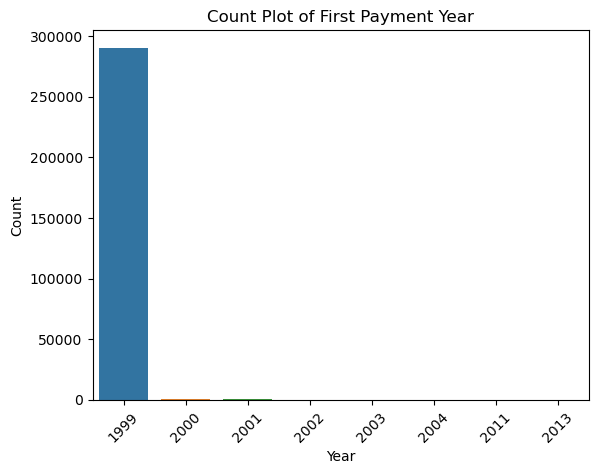

In [22]:
# Extracting the year from 'FirstPaymentDate' column
FirstPaymentYear = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m').dt.year

# Plotting the count plot
sns.countplot(x=FirstPaymentYear)
plt.title('Count Plot of First Payment Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

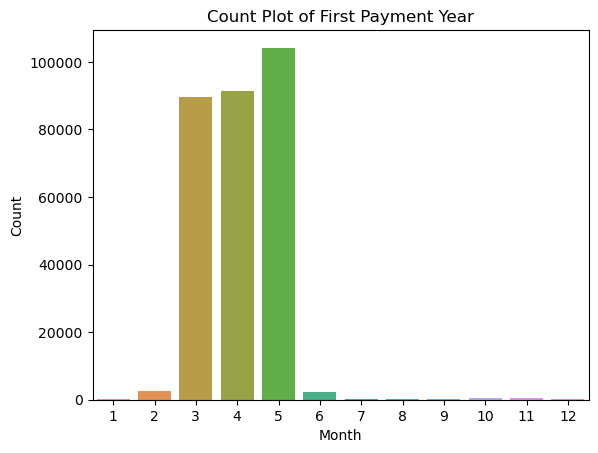

In [23]:
# Extracting the year from 'FirstPaymentDate' column
FirstPaymentMonth = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m').dt.month

# Plotting the count plot
sns.countplot(x=FirstPaymentMonth)
plt.title('Count Plot of First Payment Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

Conclusion:
> The majority of individuals made their first payment in the year 1999.  <br>
> The majority of individuals made their first payment in March, April, and May.

### **3. Columns Name:** `FirstTimeHomebuyer`
> The indicator denoting whether a borrower on the loan qualifies as a first-time homebuyer. 
Indicates whether the Borrower, or one of a group of Borrowers, is an individual who (1) is purchasing the 
mortgaged property, (2) will reside in the mortgaged property as a primary residence and (3) had no ownership 
interest (sole or joint) in a residential property during the three-year period preceding the date of the purchase of 
the mortgaged property. With certain limited exceptions, a displaced homemaker or single parent may also be 
considered a First- Time Homebuyer if the individual had no ownership interest in a residential property during 
the preceding three-year period other than an ownership interest in the marital residence with a spouse.  
“Not Available” will be indicated by 9.  
Y = Yes 
N = No 
9 = Not Available 

In [24]:
feature_detail("FirstTimeHomebuyer")

Columns Name: FirstTimeHomebuyer
Number of Unique value: 3
Datatype: object
Unique Value: ['N' 'X' 'Y']


In [25]:
# 'X' should be removed 
df = df[df.FirstTimeHomebuyer != 'X']

In [26]:
feature_detail("FirstTimeHomebuyer")

Columns Name: FirstTimeHomebuyer
Number of Unique value: 2
Datatype: object
Unique Value: ['N' 'Y']


In [27]:
df.shape

(213436, 28)

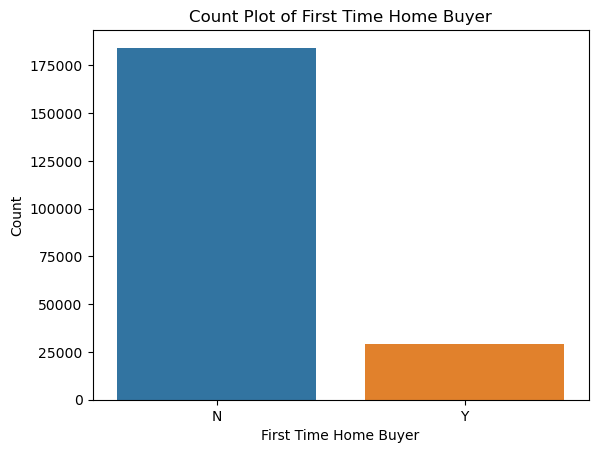

In [28]:
# Plotting the count plot
sns.countplot(x="FirstTimeHomebuyer", data=df)
plt.title('Count Plot of First Time Home Buyer')
plt.xlabel('First Time Home Buyer')
plt.ylabel('Count')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

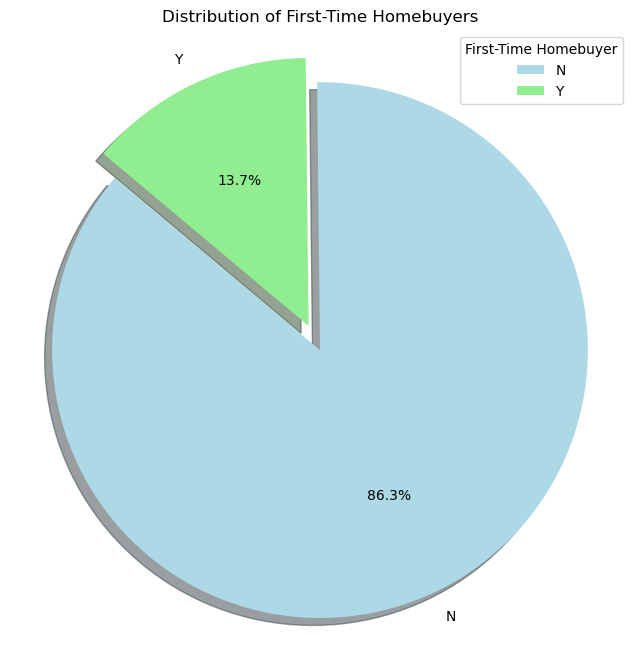

In [29]:
# Define labels and colors
labels = df['FirstTimeHomebuyer'].value_counts().index
colors = ['lightblue', 'lightgreen']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['FirstTimeHomebuyer'].value_counts(), shadow=True, autopct='%.1f%%', colors=colors, labels=labels, startangle=140, explode=(0.1, 0))
plt.title('Distribution of First-Time Homebuyers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='First-Time Homebuyer', loc='best')

plt.show()

In [30]:
df.FirstTimeHomebuyer.value_counts()

FirstTimeHomebuyer
N    184154
Y     29282
Name: count, dtype: int64

### **4. Columns Name:** `MaturityDate`

In [31]:
feature_detail("MaturityDate")

Columns Name: MaturityDate
Number of Unique value: 94
Datatype: datetime64[ns]
Unique Value: <DatetimeArray>
['2029-01-01 00:00:00', '2027-10-01 00:00:00', '2029-02-01 00:00:00',
 '2024-09-01 00:00:00', '2027-02-01 00:00:00', '2029-03-01 00:00:00',
 '2026-02-01 00:00:00', '2026-07-01 00:00:00', '2029-04-01 00:00:00',
 '2029-05-01 00:00:00', '2029-06-01 00:00:00', '2029-07-01 00:00:00',
 '2029-08-01 00:00:00', '2029-09-01 00:00:00', '2029-10-01 00:00:00',
 '2029-11-01 00:00:00', '2029-12-01 00:00:00', '2030-03-01 00:00:00',
 '2030-04-01 00:00:00', '2030-08-01 00:00:00', '2028-03-01 00:00:00',
 '2030-06-01 00:00:00', '2030-02-01 00:00:00', '2025-09-01 00:00:00',
 '2026-11-01 00:00:00', '2027-03-01 00:00:00', '2027-06-01 00:00:00',
 '2025-02-01 00:00:00', '2026-12-01 00:00:00', '2027-05-01 00:00:00',
 '2030-01-01 00:00:00', '2027-04-01 00:00:00', '2026-10-01 00:00:00',
 '2027-01-01 00:00:00', '2026-01-01 00:00:00', '2027-12-01 00:00:00',
 '2026-09-01 00:00:00', '2027-09-01 00:00:00', '202

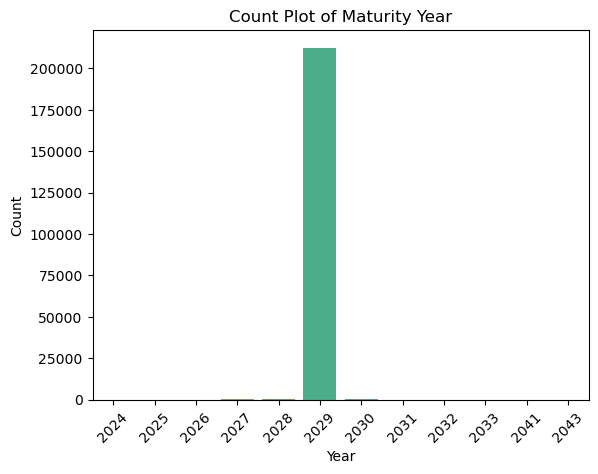

In [32]:
MaturityYear = pd.to_datetime(df['MaturityDate'], format='%Y%m').dt.year

# Plotting the count plot
sns.countplot(x=MaturityYear)
plt.title('Count Plot of Maturity Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

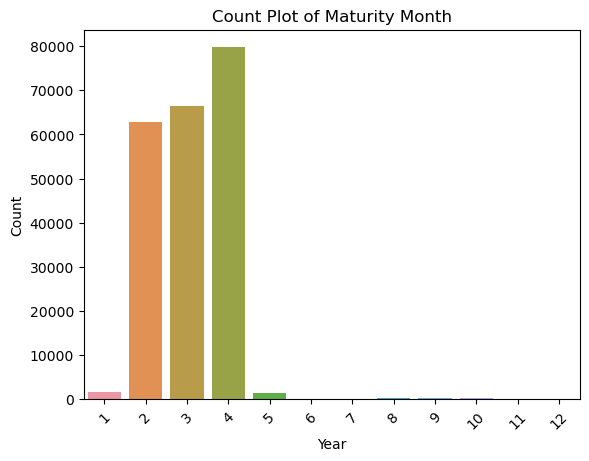

In [33]:
MaturityMonth = pd.to_datetime(df['MaturityDate'], format='%Y%m').dt.month

# Plotting the count plot
sns.countplot(x=MaturityMonth)
plt.title('Count Plot of Maturity Month')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### **5. Columns Name:** `MSA`

In [34]:
feature_detail("MSA")

Columns Name: MSA
Number of Unique value: 392
Datatype: object
Unique Value: ['16974' '19740' '29940' '31084' '35644' 'X    ' '25540' '48620' '12060'
 '12420' '13140' '13644' '15764' '16700' '16940' '17900' '19124' '20500'
 '20764' '21340' '22380' '22744' '23060' '23104' '24660' '24860' '25060'
 '26900' '27060' '27140' '27260' '28420' '29404' '30780' '31340' '33124'
 '33340' '33460' '34820' '35004' '35084' '35380' '37100' '38060' '38300'
 '38900' '39300' '39340' '39820' '40060' '40140' '40900' '41180' '41620'
 '41700' '41740' '41884' '42044' '42220' '42644' '43900' '46060' '46700'
 '47644' '47894' '49180' '49420' '12580' '14484' '14860' '17820' '19380'
 '19804' '26420' '29420' '29620' '36084' '36540' '37764' '37860' '37964'
 '38940' '40380' '45300' '48424' '19660' '11300' '11460' '12100' '12220'
 '12940' '13820' '13980' '14740' '15540' '16740' '17140' '17460' '17780'
 '22220' '23420' '23844' '24340' '24780' '26180' '27620' '28140' '31420'
 '31540' '34980' '35300' '36740' '39100' '39580

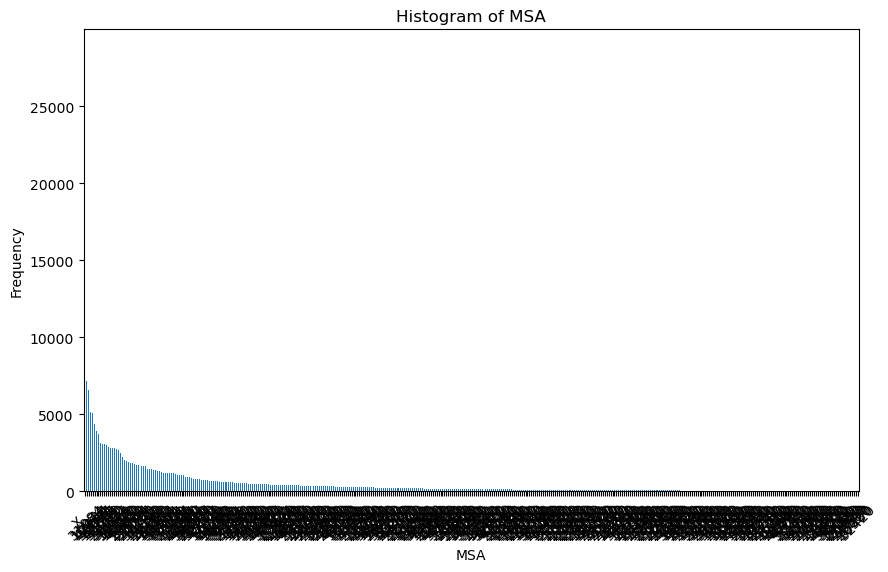

In [35]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
df['MSA'].value_counts().plot(kind='bar')
plt.title('Histogram of MSA')
plt.xlabel('MSA')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### **6. Columns Name:** `MIP`

In [36]:
feature_detail("MIP")

Columns Name: MIP
Number of Unique value: 35
Datatype: int64
Unique Value: [25  0 30 12 35 29 17 18 20 22  6 14 33 16 52 36 28 11 45 27 10 50 47  7
 24 15 37 32 26  1 13 21 23 55  4]


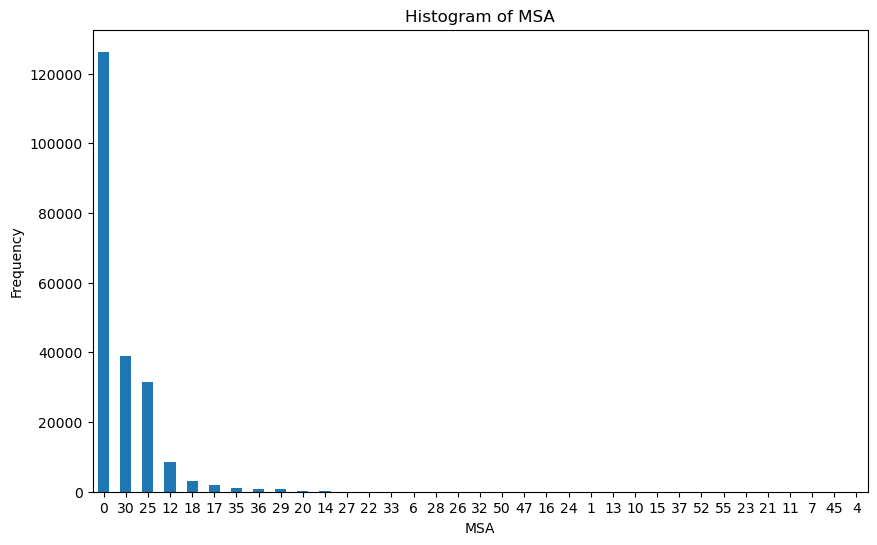

In [37]:
# Count occurrences of each unique value in the "MSA" column
mip_counts = df['MIP'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
mip_counts.plot(kind='bar')
plt.title('Histogram of MSA')
plt.xlabel('MSA')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

### **7. Columns Name:** `Units`

The number of dwelling units in the mortgaged property at the time the loan was originated. 
* “Not Available” will be indicated by 0.  
* 1 = 1 
* 2 = 2 
* 3 = 3 
* 4 = 4 
* 0 = Not Available

In [38]:
# Here 0 values of Units are null values and need to be removed
df = df[df.Units != 0]

In [39]:
feature_detail('Units')

Columns Name: Units
Number of Unique value: 4
Datatype: int64
Unique Value: [1 2 3 4]


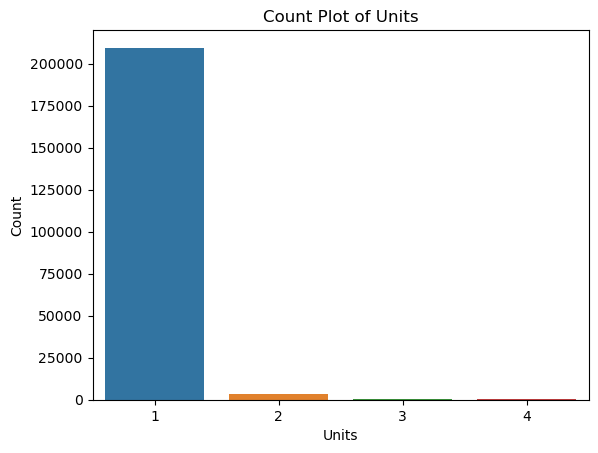

In [40]:
# Plotting the count plot
sns.countplot(x="Units", data=df)
plt.title('Count Plot of Units')
plt.xlabel('Units')
plt.ylabel('Count')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

### **8. Columns Name:** `Occupancy`
> The classification describing the property occupancy status at the time the loan was originated. 
For reperforming, modified fixed-rate and modified step-rate loans, this value will be blank. 
* “Not Available” will be indicated by a 9.   
* O = Owner-occupid 
* S = Second Home 
* I = Investment Property 
* 9 = Not Available

In [41]:
feature_detail('Occupancy')

Columns Name: Occupancy
Number of Unique value: 3
Datatype: object
Unique Value: ['O' 'I' 'S']


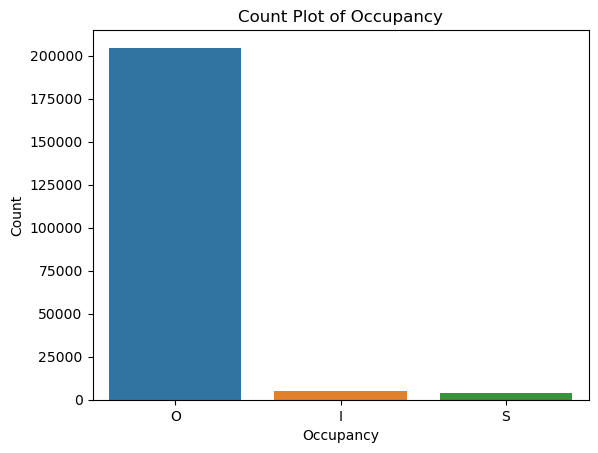

In [42]:
# Plotting the count plot
sns.countplot(x="Occupancy", data=df)
plt.title('Count Plot of Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

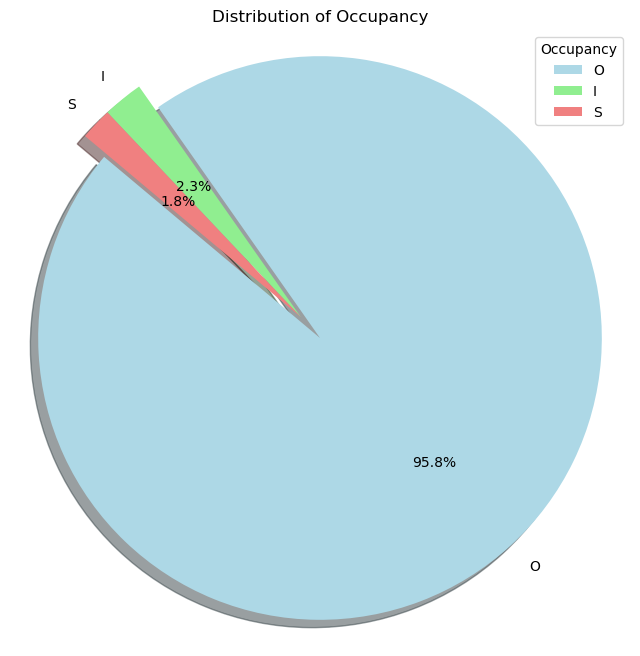

In [43]:
# Define labels and colors
labels = df['Occupancy'].value_counts().index
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Occupancy'].value_counts(), shadow=True, autopct='%.1f%%', colors=colors, labels=labels, startangle=140, explode=(0.1, 0, 0))
plt.title('Distribution of Occupancy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='Occupancy', loc='best')

plt.show()

### **9. Columns Name:** `OCLTV`

In [44]:
feature_detail('OCLTV')

Columns Name: OCLTV
Number of Unique value: 102
Datatype: int64
Unique Value: [ 89  73  75  76  78  90  95  80  77  85  93  70  74  79  72  62  44  32
  64  91  53  69  60  54  52  84  68  36  55  96  97  46  58  63  83  87
  94  48  50  51  67  86  81  66  71  82  88  26  59  57  61  30  24  34
  37  42  65  31 100   7  38  39  16  41  33  92  40  35  56  22  28  43
  47  49  98  29  45  25 103  10  18  23  20  15 102 101  14  21  27 105
  19   8   0 104  17 110  99  12   6  13   9  11]


### **10. Columns Name:** `DTI`

In [45]:
feature_detail("DTI")

Columns Name: DTI
Number of Unique value: 66
Datatype: int64
Unique Value: [27 17 16 14 18 40 21 38 19 23 45 28 29 15 43 25 24 26 20 35 46 39 33 48
 30 31 22 56 32 12  6 37 36 42 34 11 41  8 44 55  0 51 10  7 47  9 13 65
 54  2 53 57  5  3  4 50 59 49 52 64 60 58  1 61 62 63]


### **11. Columns Name:** `OrigUPB`

In [46]:
feature_detail("OrigUPB")

Columns Name: OrigUPB
Number of Unique value: 360
Datatype: int64
Unique Value: [117000 109000  88000 160000 207000 111000  55000  35000 126000 200000
  70000  93000  79000  54000  80000 231000 145000 187000 148000  90000
  65000  86000 122000 157000  94000  63000  50000 100000 191000 204000
 222000 189000  57000 202000 137000  56000 140000  18000  76000  77000
 151000 118000 182000  98000  89000 172000  82000 240000 102000 173000
  51000 169000 101000 152000 141000  47000 128000 133000 135000 115000
 144000 146000 212000 176000 214000 190000 227000  99000  83000  49000
  29000 124000 132000 150000 300000  95000 149000 162000 226000 110000
 112000 219000 236000  67000 195000 164000 198000  60000 194000 147000
 104000  72000 183000 154000 179000  66000 210000  46000  96000 225000
 156000  45000 235000 113000 139000  74000  68000  69000 238000 142000
  73000  48000  97000  44000  36000  42000 193000 119000 131000  26000
 114000 143000  81000  52000 209000 248000 185000  61000  30000  410

### **12. Columns Name:** `LTV`

In [47]:
feature_detail("LTV")

Columns Name: LTV
Number of Unique value: 96
Datatype: int64
Unique Value: [ 89  73  75  76  78  90  95  80  77  85  93  70  74  79  72  62  44  32
  64  91  53  69  60  54  52  84  68  36  55  96  97  46  58  63  83  87
  94  48  50  51  67  86  81  66  71  82  88  26  59  57  61  30  24  34
  37  42  65  31   7  38  39  16  41  33  92  40  35  56  22  28  43  47
 100  49  98  29  45  25  10  18  23  20  15 103  14  21  27  19   8   0
  17  12   6  13   9  11]


### **13. Columns Name:** `OrigInterestRate`

In [48]:
feature_detail("OrigInterestRate")

Columns Name: OrigInterestRate
Number of Unique value: 235
Datatype: float64
Unique Value: [ 6.75   6.5    6.875  7.125  7.     7.25   6.625  7.75   7.2    7.5
  7.625  7.875  6.25   8.125  7.15   7.375  6.375  8.75   7.1    7.05
  6.95   8.     8.625  8.375  8.5    6.125  6.     5.875  8.25   8.99
  5.625  9.     5.125  5.25   9.125  6.99   5.375  8.365  8.875  6.975
  7.3    7.313  9.625  9.25   5.75   7.85   8.695  4.875  7.775  7.29
  7.405  9.5    9.375  9.75   7.13   5.99   6.999  7.055  7.09   6.785
  7.08   7.025  7.7    7.58  10.5    7.55   7.445  9.875  6.85   6.925
  6.9    8.37   7.095  7.19   7.456  7.675  9.675  7.475  7.22   7.17
  8.7    7.301  8.9   10.     5.5    6.62   7.325 10.375  7.8    7.4
 10.85   7.185  7.245 11.5    6.94   6.87   7.65   7.312  7.28   7.39
  7.07   7.43   7.48   6.88   8.45   6.895  5.     6.3    7.49   6.8
  6.63   8.05   7.275  7.175  7.225  7.075  8.8    7.33   9.95   7.35
  7.23   7.91   7.575  7.425  7.03   7.31  10.625  7.14   7.12   7.24

### **14. Columns Name:** `Channel`

In [49]:
feature_detail("Channel")

Columns Name: Channel
Number of Unique value: 4
Datatype: object
Unique Value: ['T' 'R' 'C' 'B']


### **15. Columns Name:** `PPM`
**PPM (Prepayment Penalty Mortgage)**: A binary indicator (Y/N) indicating whether the mortgage has a prepayment penalty.

In [50]:
feature_detail("PPM")

Columns Name: PPM
Number of Unique value: 3
Datatype: object
Unique Value: ['N' 'X' 'Y']


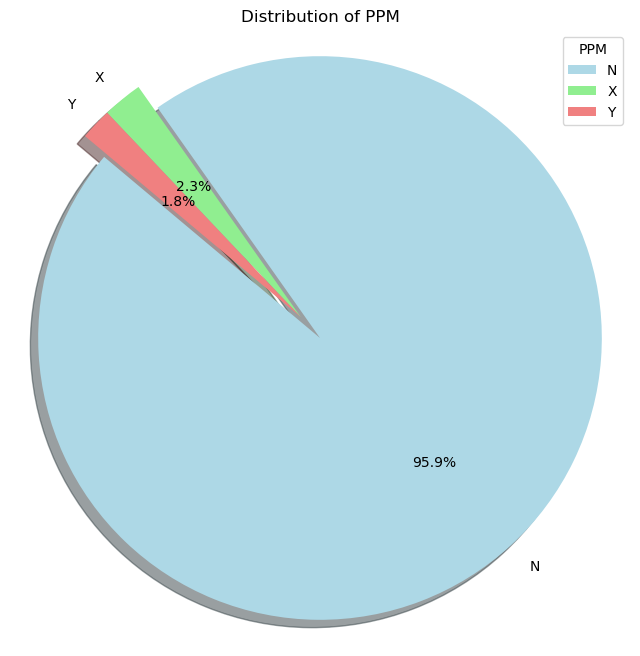

In [51]:
# Define labels and colors
labels = df['PPM'].value_counts().index
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['PPM'].value_counts(), shadow=True, autopct='%.1f%%', colors=colors, labels=labels, startangle=140, explode=(0.1, 0, 0))
plt.title('Distribution of PPM')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='PPM', loc='best')

plt.show()

### **16. Columns Name:** `ProductType`

In [52]:
feature_detail("ProductType")

Columns Name: ProductType
Number of Unique value: 1
Datatype: object
Unique Value: ['FRM  ']


### **17. Columns Name:** `PropertyState`

In [53]:
feature_detail("PropertyState")

Columns Name: PropertyState
Number of Unique value: 53
Datatype: object
Unique Value: ['IL' 'CO' 'KS' 'CA' 'NJ' 'WI' 'CT' 'GA' 'TX' 'MD' 'MA' 'SC' 'WY' 'NC'
 'AZ' 'FL' 'IN' 'MS' 'NY' 'WA' 'AR' 'VA' 'MN' 'LA' 'PA' 'OR' 'RI' 'UT'
 'MI' 'TN' 'AL' 'MO' 'OH' 'NE' 'VT' 'HI' 'ID' 'IA' 'NV' 'PR' 'DC' 'NM'
 'GU' 'KY' 'NH' 'ME' 'MT' 'OK' 'WV' 'SD' 'DE' 'ND' 'AK']


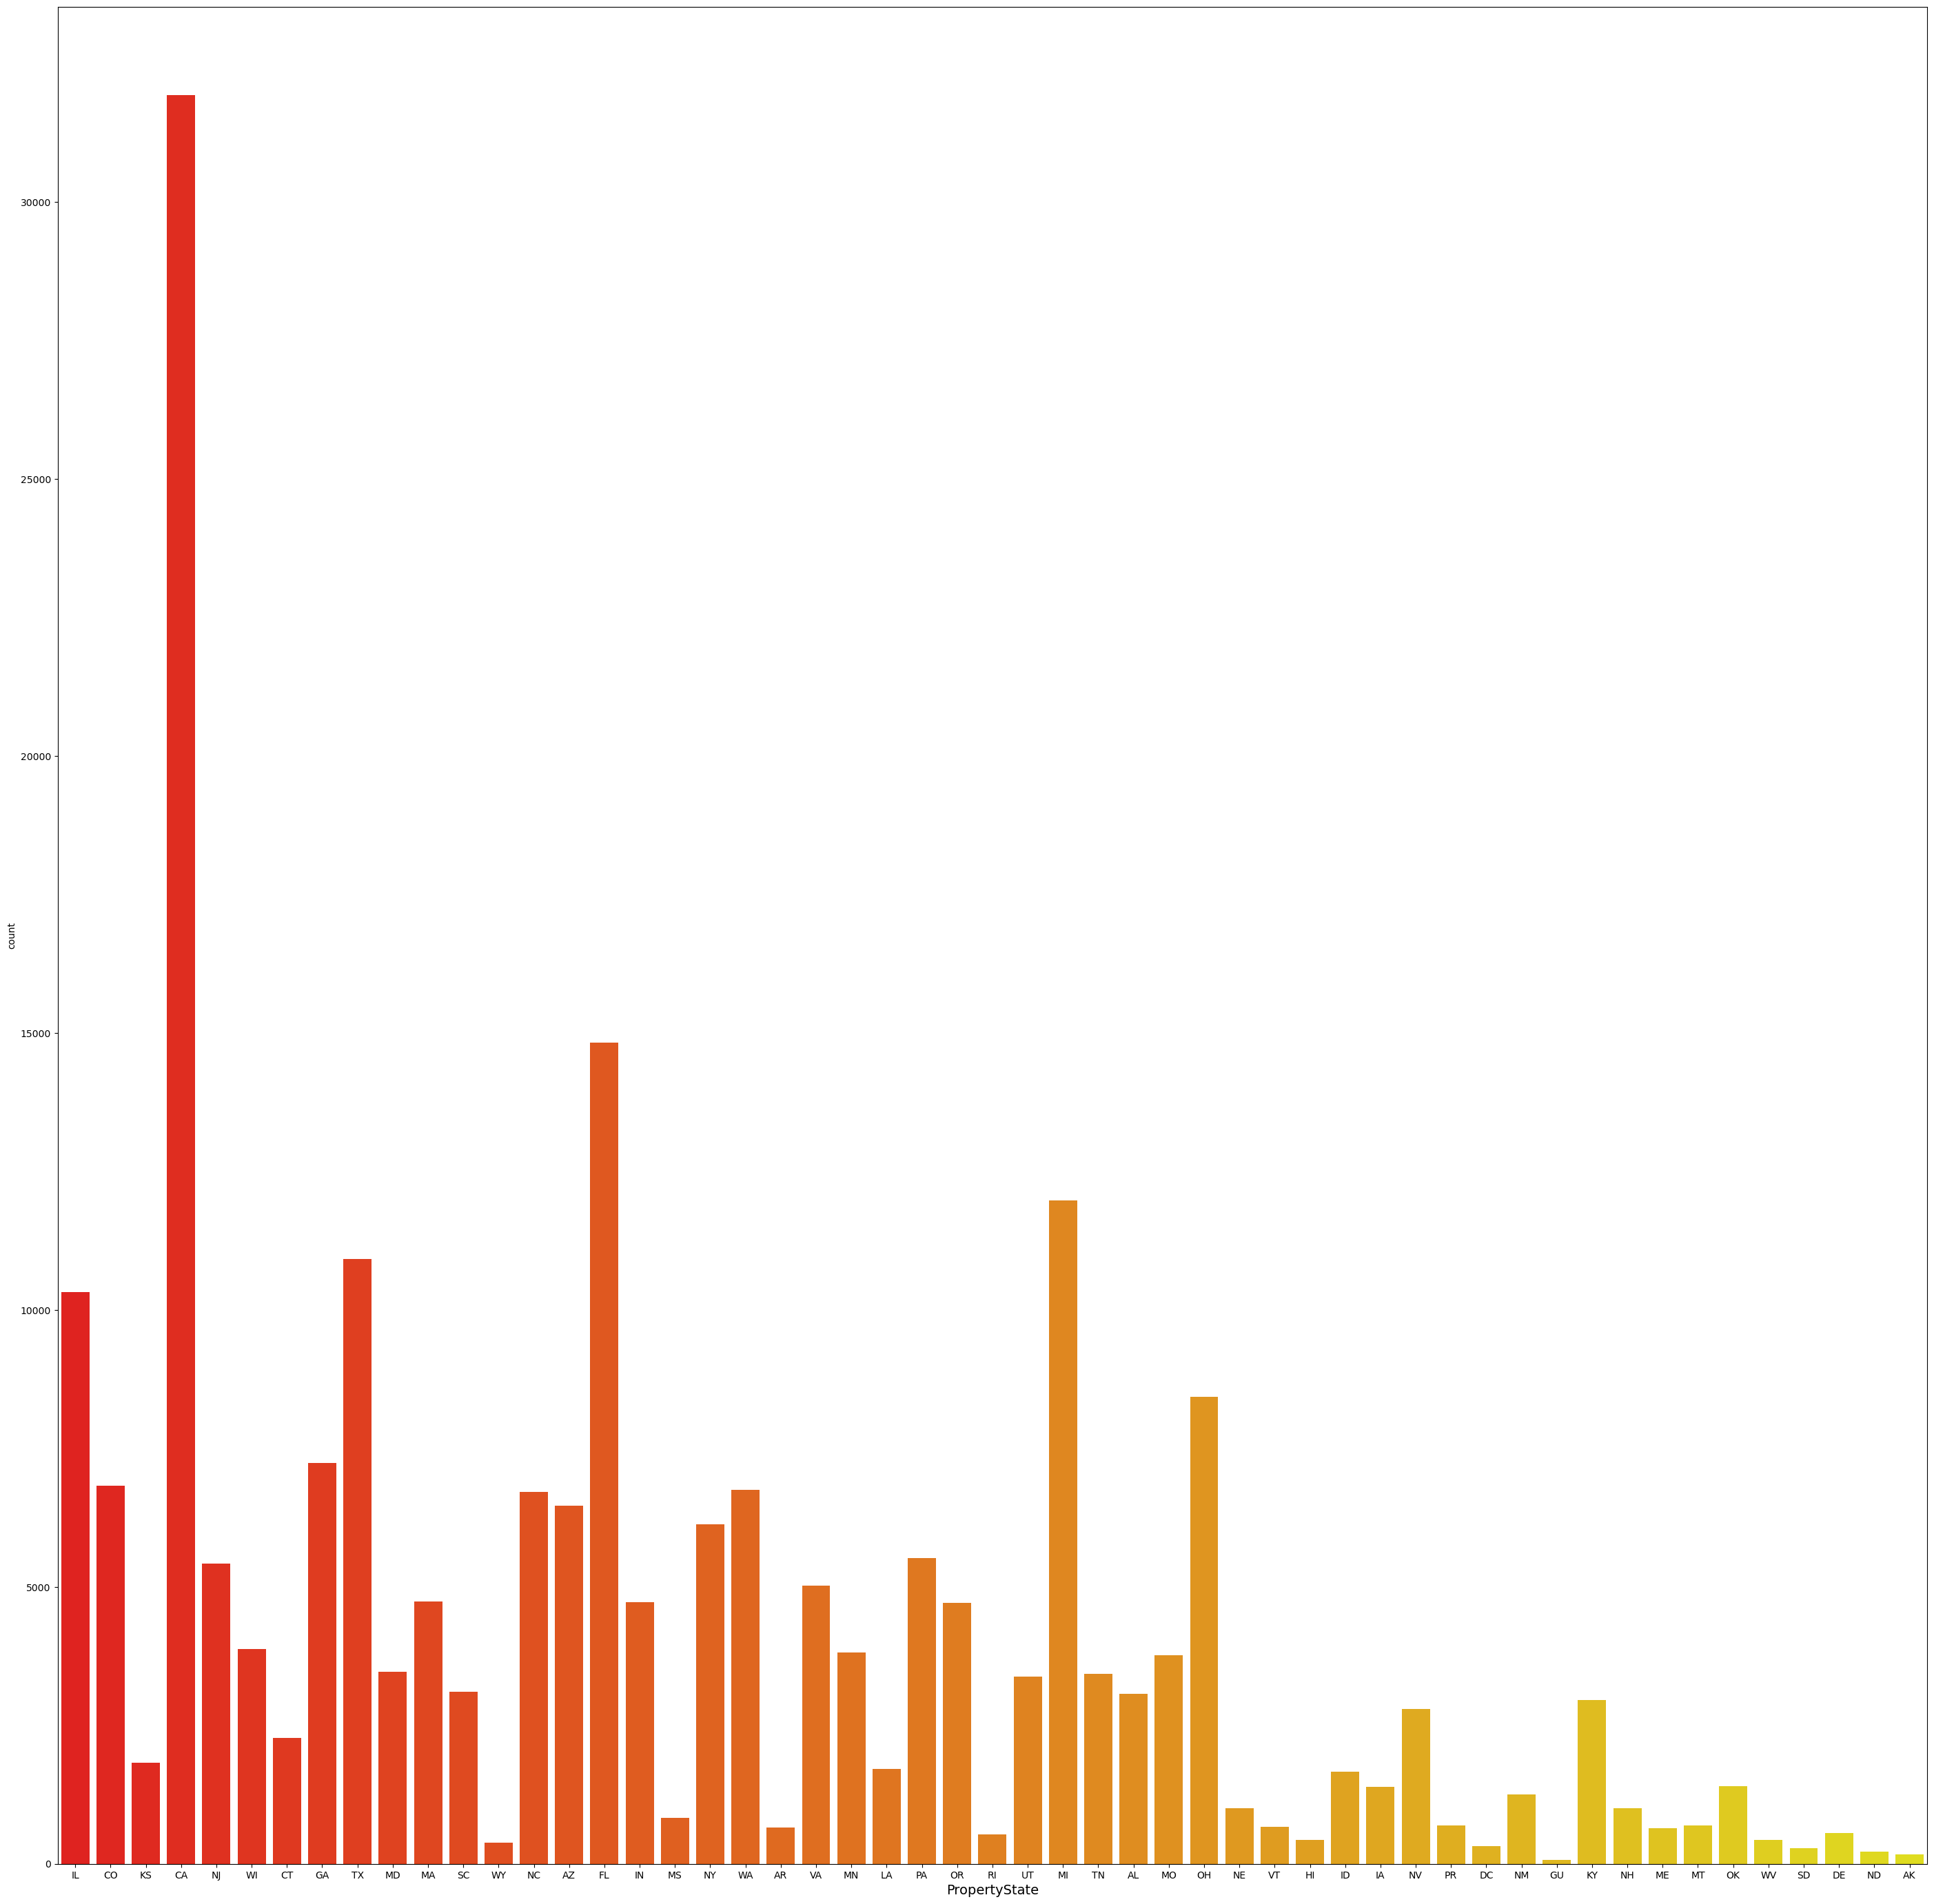

In [54]:
plt.figure(figsize=(35,35))
sns.countplot(x='PropertyState',data=df,palette="autumn")
plt.xlabel("PropertyState",fontsize=14)
plt.show()

### **18. Columns Name:** `PropertyType`

In [55]:
feature_detail("PropertyType")

Columns Name: PropertyType
Number of Unique value: 7
Datatype: object
Unique Value: ['SF' 'PU' 'CO' 'MH' 'CP' 'LH' 'X ']


### **19. Columns Name:** `PostalCode`

In [56]:
feature_detail("PostalCode")

Columns Name: PostalCode
Number of Unique value: 888
Datatype: object
Unique Value: ['60400' '80200' '66000' '90700' '7600' '80400' '53100' '6400' '67000'
 '30100' '30000' '30600' '30200' '30300' '78700' '77700' '20800' '1800'
 '29400' '82000' '60000' '60200' '60600' '60100' '29000' '75200' '27500'
 '7700' '79900' '86000' '33300' '33000' '46800' '76100' '27400' '29600'
 '39500' '6100' '46000' '14800' '39100' '32200' '99300' '72200' '91300'
 '91700' '24500' '33100' '53000' '55300' '55400' '29500' '11900' '7000'
 '7900' '70000' '7400' '11400' '85200' '85300' '15000' '97200' '97000'
 '2800' '2000' '84000' '96000' '23200' '92200' '92800' '95600' '95800'
 '62200' '78200' '92100' '94400' '92600' '95400' '98200' '98000' '98100'
 '29300' '85700' '94500' '48100' '48300' '48000' '20100' '22300' '22200'
 '27100' '98900' '60500' '48400' '8500' '46900' '22900' '85600' '37100'
 '75400' '36500' '95200' '91000' '48600' '97300' '98600' '36200' '64000'
 '97700' '76200' '95900' '27000' '28500' '21200' '2

### **20. Columns Name:** `LoanSeqNum`

In [57]:
feature_detail("LoanSeqNum")

Columns Name: LoanSeqNum
Number of Unique value: 213434
Datatype: object
Unique Value: ['F199Q1268030' 'F199Q1015092' 'F199Q1266886' ... 'F199Q1401282'
 'F199Q1220924' 'F199Q1220923']


### **21. Columns Name:** `LoanPurpose`

In [58]:
feature_detail("LoanPurpose")

Columns Name: LoanPurpose
Number of Unique value: 3
Datatype: object
Unique Value: ['P' 'N' 'C']


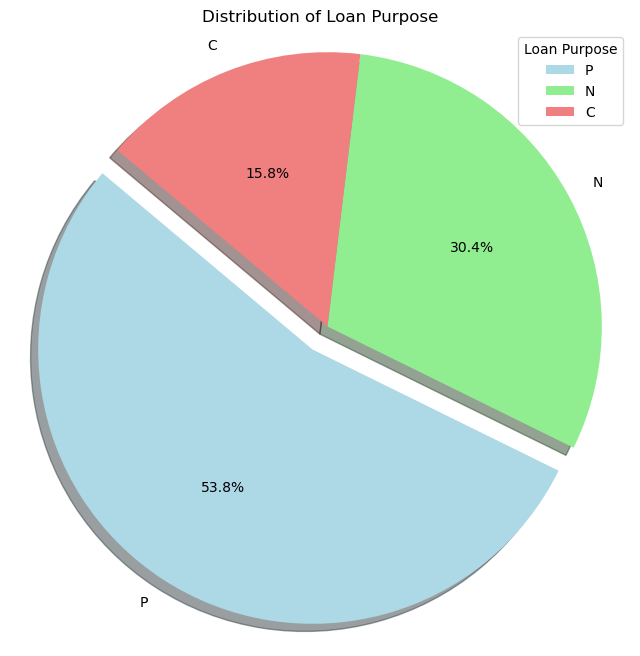

In [59]:
# Define labels and colors
labels = df['LoanPurpose'].value_counts().index
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['LoanPurpose'].value_counts(), shadow=True, autopct='%.1f%%', colors=colors, labels=labels, startangle=140, explode=(0.1, 0, 0))
plt.title('Distribution of Loan Purpose')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='Loan Purpose', loc='best')

plt.show()

### **22. Columns Name:** `OrigLoanTerm`

In [60]:
feature_detail("OrigLoanTerm")

Columns Name: OrigLoanTerm
Number of Unique value: 61
Datatype: int64
Unique Value: [360 345 306 335 322 327 358 355 356 354 346 344 348 313 316 353 319 332
 336 338 312 328 351 333 359 331 337 334 357 330 350 341 343 325 326 324
 347 352 329 339 309 317 349 342 304 310 340 301 305 315 323 321 320 302
 314 318 308 303 307 361 311]


### **23. Columns Name:** `NumBorrowers`

In [61]:
feature_detail("NumBorrowers")

Columns Name: NumBorrowers
Number of Unique value: 3
Datatype: object
Unique Value: ['2' '1' 'X ']


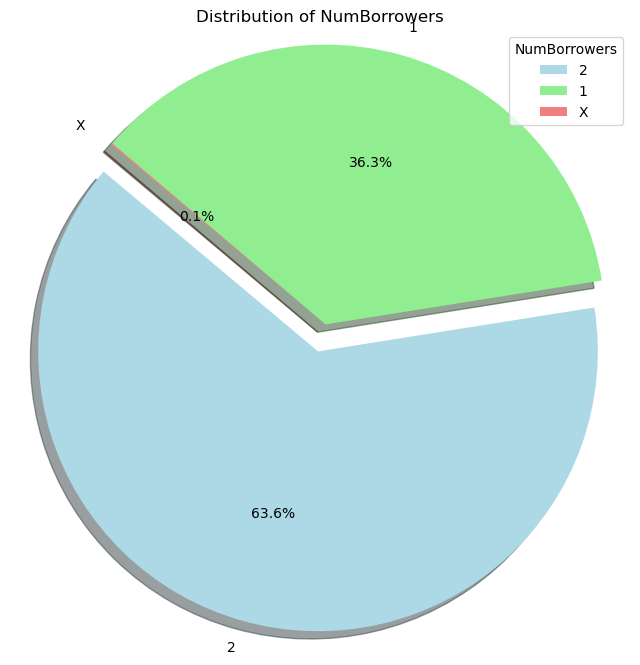

In [62]:
# Define labels and colors
labels = df['NumBorrowers'].value_counts().index
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['NumBorrowers'].value_counts(), shadow=True, autopct='%.1f%%', colors=colors, labels=labels, startangle=140, explode=(0.1, 0, 0))
plt.title('Distribution of NumBorrowers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='NumBorrowers', loc='best')

plt.show()

### **24. Columns Name:** `SellerName`

In [63]:
feature_detail("SellerName")

Columns Name: SellerName
Number of Unique value: 20
Datatype: object
Unique Value: ['FL' 'FT' 'GM' 'Ot' 'RE' 'ST' 'CR' 'CH' 'FI' 'HO' 'PR' 'NO' nan 'PN' 'WA'
 'BA' 'G ' 'OL' 'AC' 'CO' 'BI']


### **25. Columns Name:** `ServicerName`

In [64]:
feature_detail("ServicerName")

Columns Name: ServicerName
Number of Unique value: 20
Datatype: object
Unique Value: ['WASHINGTONMUTUALBANK' 'CHASEHOMEFINANCELLC ' 'GMACMTGECORP        '
 'Other servicers     ' 'WELLSFARGOBANKNA   ' 'ABNAMROMTGEGROUPINC'
 'BANKOFAMERICANA    ' 'CHASEMANHATTANMTGECO' 'HOMESIDELENDINGINC '
 'CHASEMTGECO         ' 'WELLSFARGOHOMEMORTGA' 'PRINCIPALRESIDENTIAL'
 'CITIMORTGAGEINC    ' 'JPMORGANCHASEBANKNA' 'BAMORTGAGELLC      '
 'NATLCITYMTGECO      ' 'FTMTGESERVICESINC  ' 'SUNTRUSTMORTGAGEINC'
 'COUNTRYWIDE         ' 'FIFTHTHIRDBANK      ']


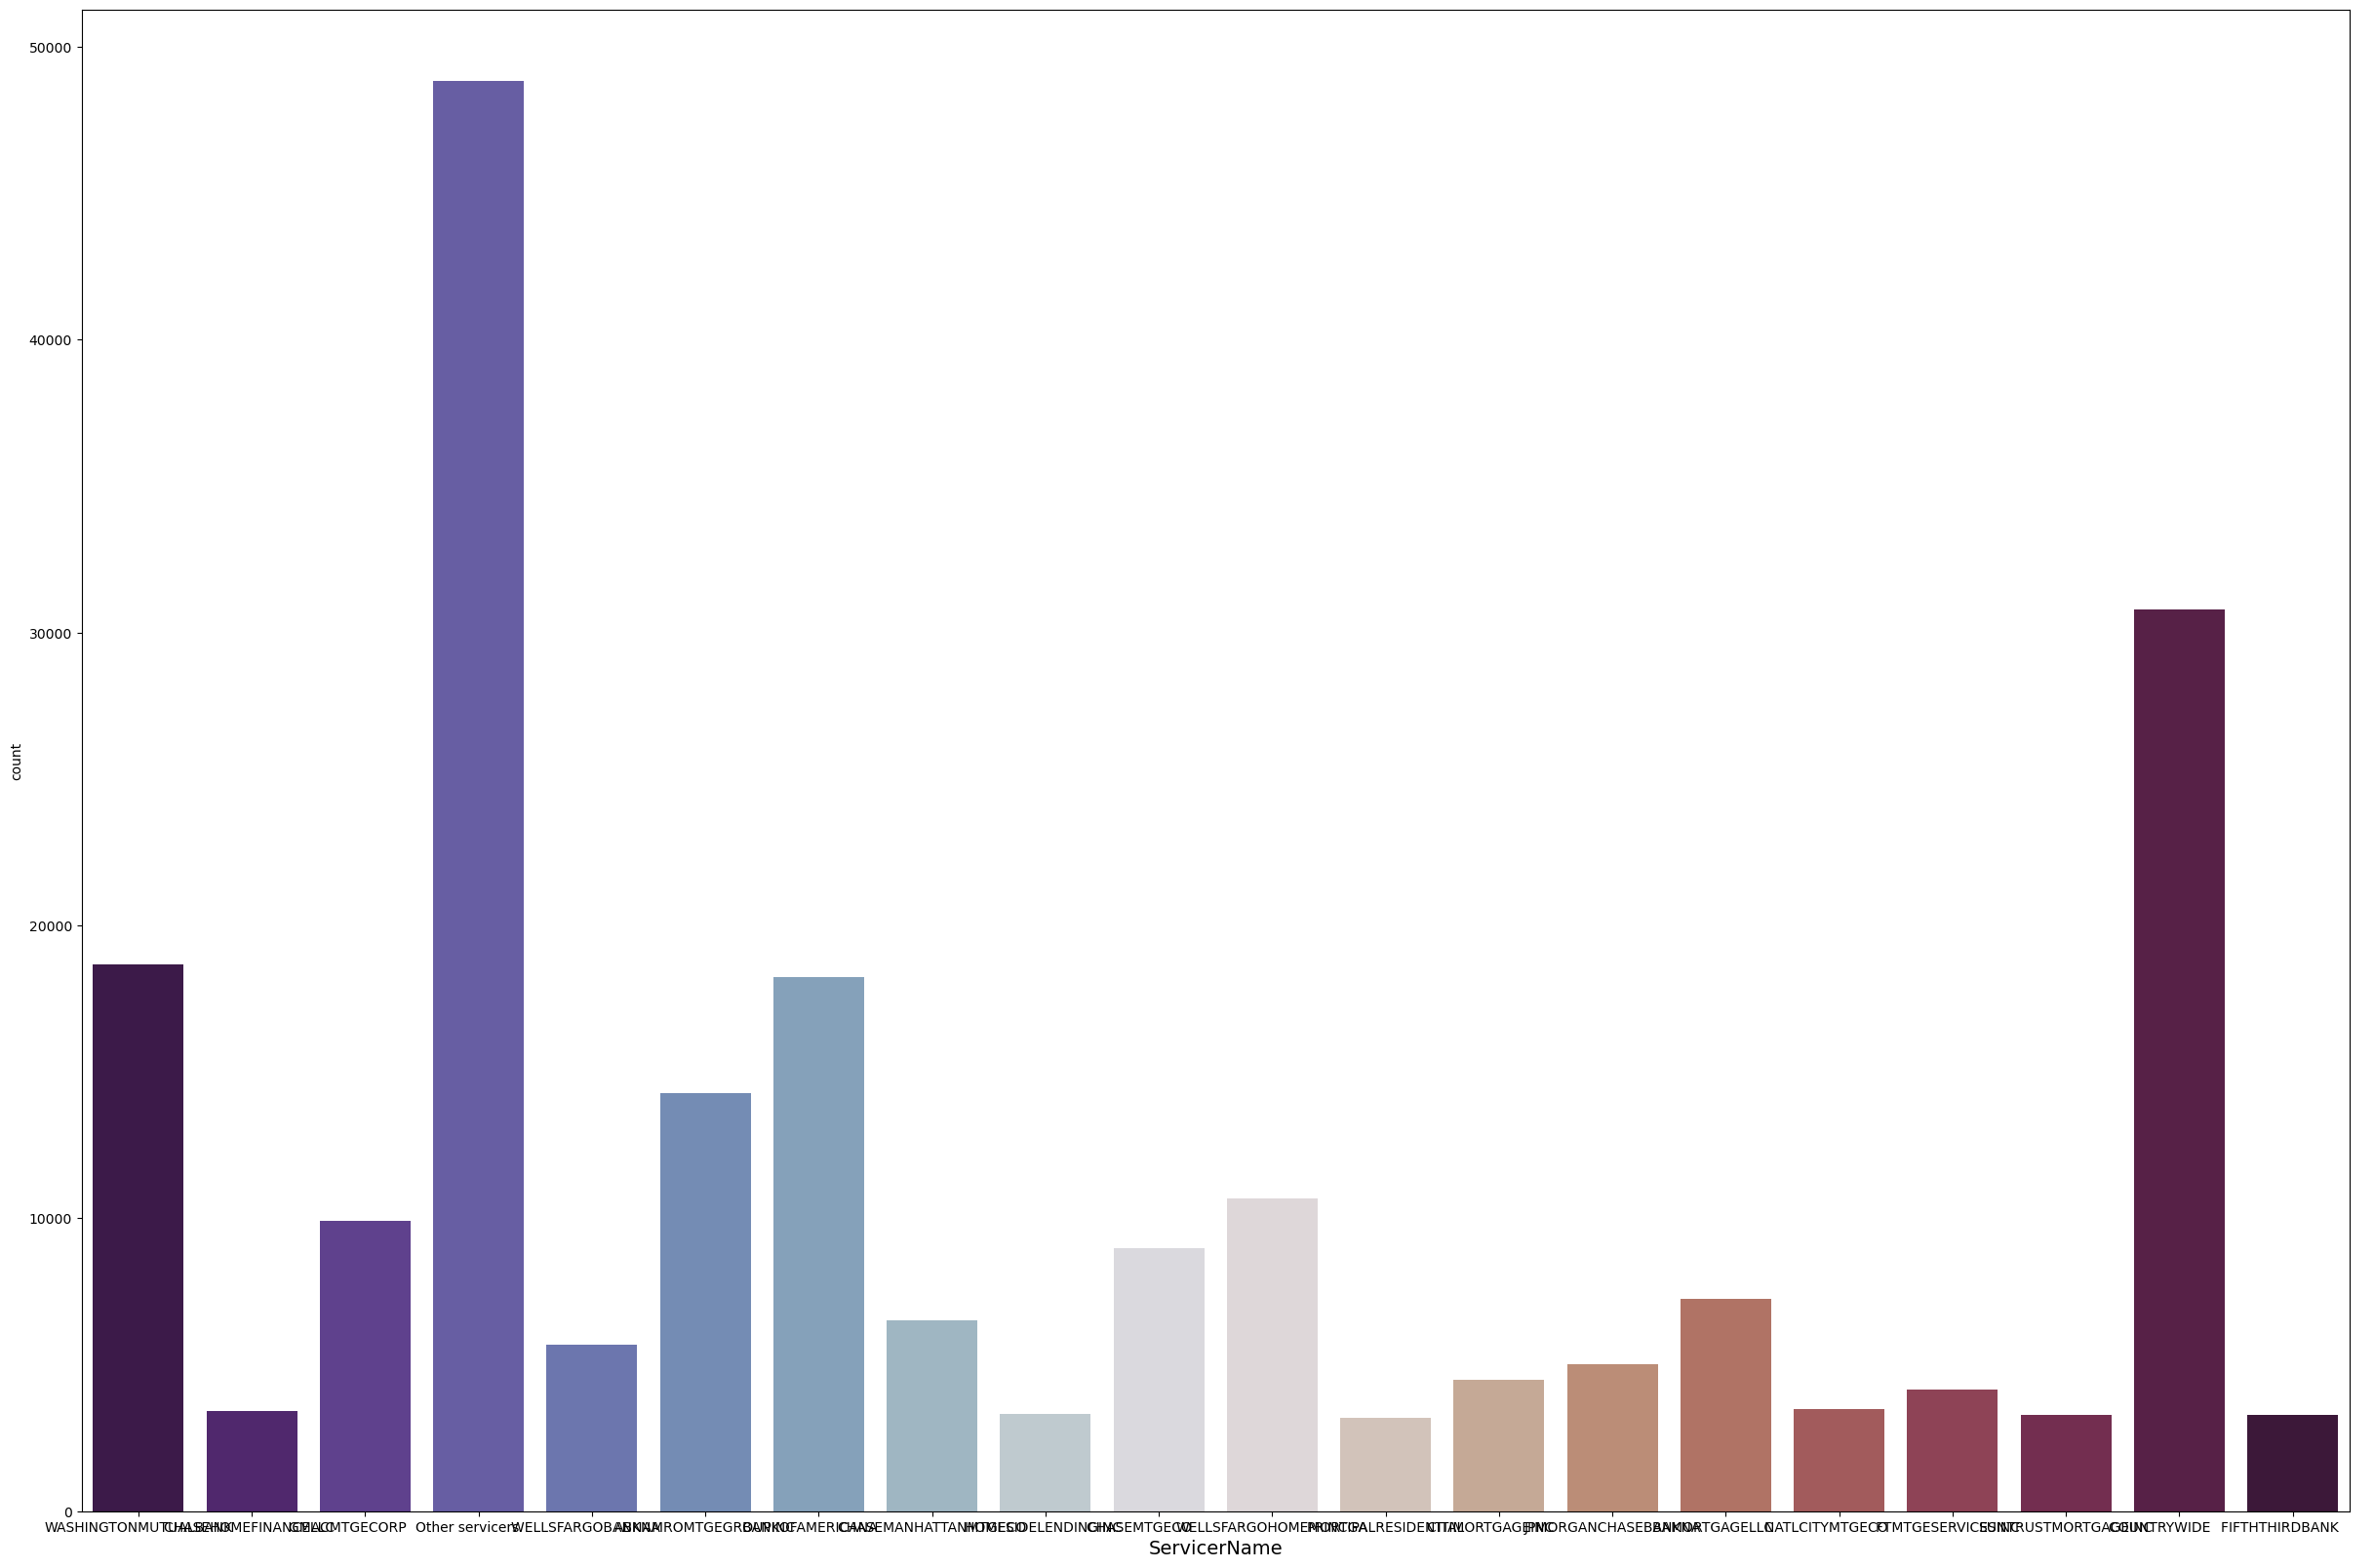

In [65]:
plt.figure(figsize=(30,20))
sns.countplot(x='ServicerName',data=df,palette="twilight_shifted")
plt.xlabel("ServicerName",fontsize=14)
plt.show()

### **26. Columns Name:** `EverDelinquent`

In [66]:
feature_detail("EverDelinquent")

Columns Name: EverDelinquent
Number of Unique value: 2
Datatype: int64
Unique Value: [0 1]


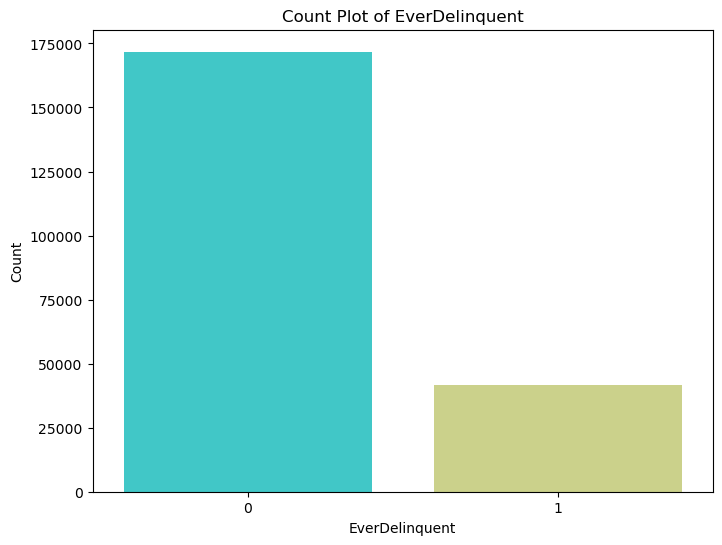

In [67]:
# Plotting the count plot for 'EverDelinquent' column
plt.figure(figsize=(8, 6))
sns.countplot(x=df['EverDelinquent'], palette='rainbow')
plt.title('Count Plot of EverDelinquent')
plt.xlabel('EverDelinquent')
plt.ylabel('Count')
plt.show()

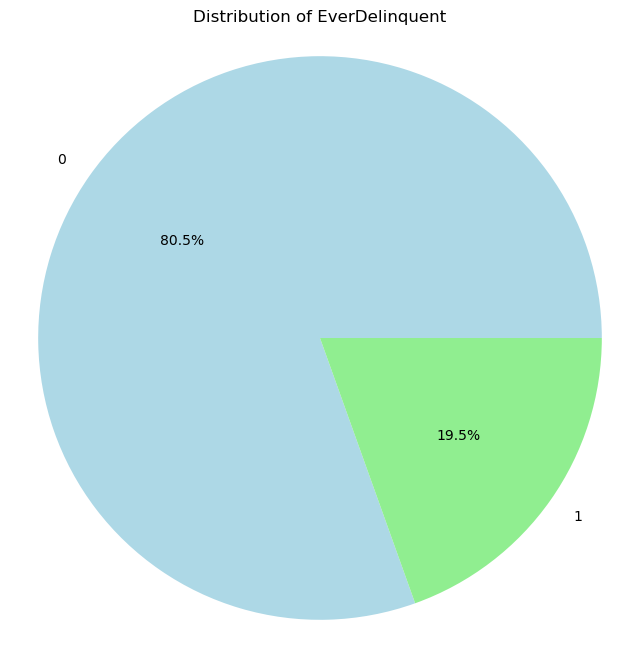

In [68]:
# Count the occurrences of each unique value in the 'EverDelinquent' column
counts = df['EverDelinquent'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of EverDelinquent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### **27. Columns Name:** `MonthsDelinquent`

In [69]:
feature_detail("MonthsDelinquent")

Columns Name: MonthsDelinquent
Number of Unique value: 173
Datatype: int64
Unique Value: [  0 104   5  23  32   1   2   4  20  10   3  34  35   6  11 153   7  15
   8  18  78  24  14  17  25   9  66  36  19  27  28  49  13  50  26  29
  12  16  21  22 118  30  69 158  62  43  38  64  71  92  41  91  83 130
 102  33  31  85  47  45  37  61  39  55  48  74 151 124 105  60  84  46
  51  99 107  73 170  86 149  40 106  63 112 110  54  77 122 180  58  53
 100 116  56  42 163 111 141 169  59  57  44  82  70  79  65 134  89 150
 113 109  52 146  75  81 133  97 103  67 101  72 120  87  93 140  96  98
 132 108 115  80 121 127 138  88 156 119  95 129 139 165 117  90 114 157
  68  76 160 123 148  94 143 137 152 175 131 162 179 145 128 126 178 172
 135 125 168 159 142 161 136 147 144 171 154]


### **28. Columns Name:** `MonthsInRepayment`

In [70]:
feature_detail("MonthsInRepayment")

Columns Name: MonthsInRepayment
Number of Unique value: 212
Datatype: int64
Unique Value: [ 52 144  67  35  54  42  44  64 212  37  47  53  55  66  26  38  36  39
  40  11 176  46 197 210  56 118  63  24  28  91  50  22 211 199  23  30
 125  41  76  49  18  19  43  60  83  95  29  45  13   6  48  62  14  15
 111  51  17  75  58  27  10  31 133 165 156  33  68 205  57 159  81 191
 194 114  59 100 134 128  71   7  65  74  79 174 195 151  34 149  21  12
 137 130  69  70 173 166  61 160  20 178   3  72 147   2  32 164 139 108
 148  92 209 102  87  94  73 123  16 142   1 172 109 141 175 103 168   5
 155 177 158 138  25 110  98  84 136   8 121 179   4 154 161 157 150  80
 170  77   9 183  93 143 162 126  89 208 184  82 145 117 101 122 107 193
  85  78 169 104 131 140 163 112 206 135 132 124 186 127 189 190 198 192
 167 146 119  99  90 201 120  96 202 116 171  88 106  86 181 203 153  97
 207 182 105 188 185 196 129 115 152 200 113 187 180 204]


## **Step 7:** *Bi-Varient Analysis*

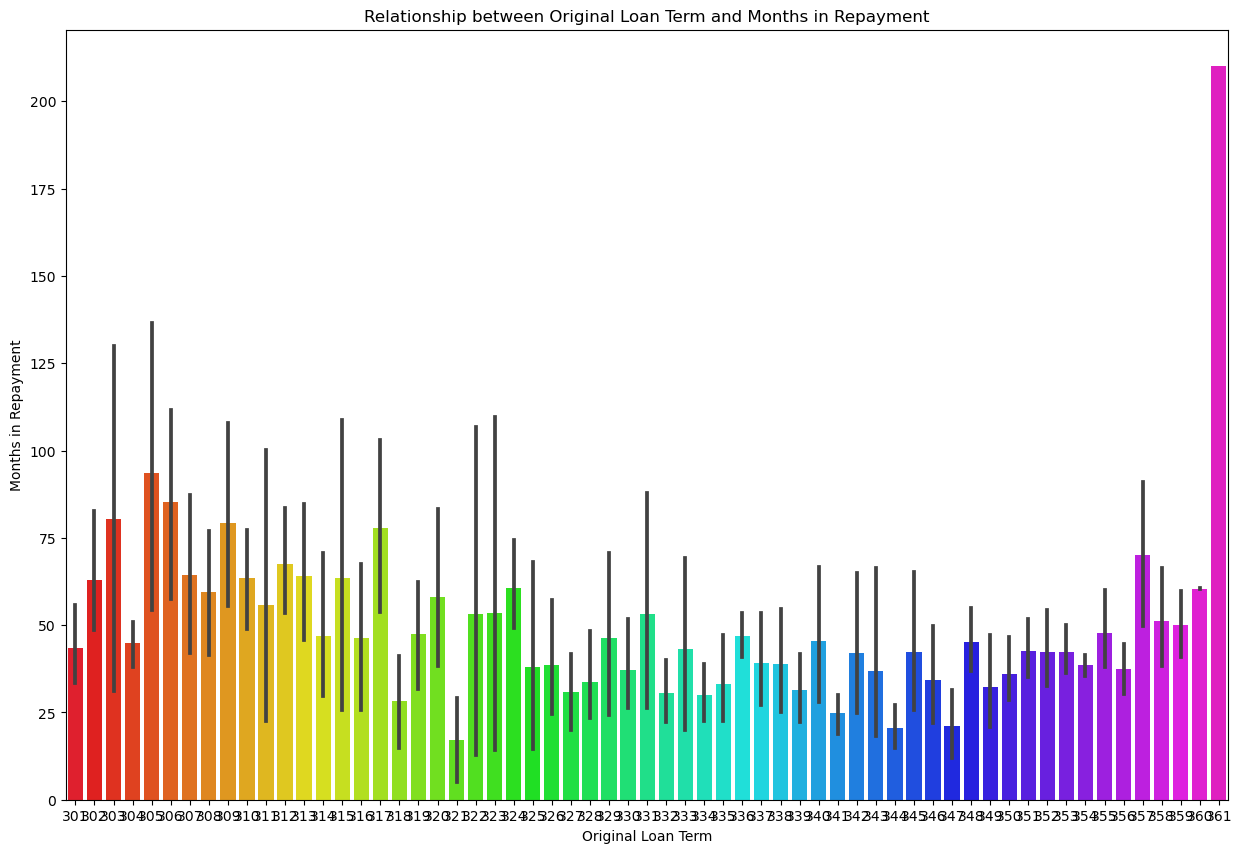

In [71]:
plt.figure(figsize=(15, 10))
sns.barplot(x='OrigLoanTerm', y='MonthsInRepayment', data=df, palette='gist_rainbow')
plt.xlabel('Original Loan Term')
plt.ylabel('Months in Repayment')
plt.title('Relationship between Original Loan Term and Months in Repayment')
plt.show()

## **Step 8:** *Feature Engineering*

In [72]:
data = df.copy()

In [73]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [74]:
temp1 = pd.get_dummies(data['LoanPurpose'], prefix='LoanPurpose')
temp2 = pd.get_dummies(data['FirstTimeHomebuyer'], prefix='FirstTimeHomebuyer')

In [75]:
df = pd.concat([data, temp1], axis=1)
df=pd.concat([df, temp2], axis =1)

In [76]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_N,FirstTimeHomebuyer_Y
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,False,False,True,True,False
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,False,True,False,True,False
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,False,True,False,True,False
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,False,True,False,True,False
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12,False,True,False,True,False
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53,False,False,True,True,False
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38,False,True,False,True,False
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32,False,False,True,True,False


In [77]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_N,FirstTimeHomebuyer_Y
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,False,False,True,True,False
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,False,True,False,True,False
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,False,True,False,True,False
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,False,True,False,True,False
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12,False,True,False,True,False
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53,False,False,True,True,False
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38,False,True,False,True,False
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32,False,False,True,True,False


In [78]:
# Eliminating useless features
columns_to_drop = [
    'FirstTimeHomebuyer',
    'FirstTimeHomebuyer_Y',
    'FirstTimeHomebuyer_N',
    'ServicerName',
    'SellerName',
    'NumBorrowers',
    'PropertyType',
    'PropertyState',
    'ProductType',
    'PPM',
    'Channel',
    'Occupancy',
    'MSA',
    'MaturityDate',
    'FirstPaymentDate',
    'LoanPurpose',
    'PostalCode',
    'LoanSeqNum'
]

df.drop(columns_to_drop, inplace=True, axis=1)

In [79]:
df

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,False,False,True
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,False,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,False,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,False,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,0,1,60,32,90000,60,7.000,360,0,0,12,False,True,False
291447,840,0,1,73,0,267000,73,6.375,319,0,0,53,False,False,True
291448,840,0,1,73,31,87000,73,5.625,313,0,0,38,False,True,False
291449,845,0,1,80,54,88000,80,7.000,360,0,0,32,False,False,True


In [80]:
df.shape

(213434, 15)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213434 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        213434 non-null  int64  
 1   MIP                213434 non-null  int64  
 2   Units              213434 non-null  int64  
 3   OCLTV              213434 non-null  int64  
 4   DTI                213434 non-null  int64  
 5   OrigUPB            213434 non-null  int64  
 6   LTV                213434 non-null  int64  
 7   OrigInterestRate   213434 non-null  float64
 8   OrigLoanTerm       213434 non-null  int64  
 9   EverDelinquent     213434 non-null  int64  
 10  MonthsDelinquent   213434 non-null  int64  
 11  MonthsInRepayment  213434 non-null  int64  
 12  LoanPurpose_C      213434 non-null  bool   
 13  LoanPurpose_N      213434 non-null  bool   
 14  LoanPurpose_P      213434 non-null  bool   
dtypes: bool(3), float64(1), int64(11)
memory usage: 21.8 MB


In [82]:
# Convert boolean columns to numerical
df['LoanPurpose_C'] = df['LoanPurpose_C'].astype(int)
df['LoanPurpose_N'] = df['LoanPurpose_N'].astype(int)
df['LoanPurpose_P'] = df['LoanPurpose_P'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213434 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        213434 non-null  int64  
 1   MIP                213434 non-null  int64  
 2   Units              213434 non-null  int64  
 3   OCLTV              213434 non-null  int64  
 4   DTI                213434 non-null  int64  
 5   OrigUPB            213434 non-null  int64  
 6   LTV                213434 non-null  int64  
 7   OrigInterestRate   213434 non-null  float64
 8   OrigLoanTerm       213434 non-null  int64  
 9   EverDelinquent     213434 non-null  int64  
 10  MonthsDelinquent   213434 non-null  int64  
 11  MonthsInRepayment  213434 non-null  int64  
 12  LoanPurpose_C      213434 non-null  int32  
 13  LoanPurpose_N      213434 non-null  int32  
 14  LoanPurpose_P      213434 non-null  int32  
dtypes: float64(1), int32(3), int64(11)
memory usage: 23.6 MB

In [84]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0


In [85]:
df.isnull().sum()

CreditScore          0
MIP                  0
Units                0
OCLTV                0
DTI                  0
OrigUPB              0
LTV                  0
OrigInterestRate     0
OrigLoanTerm         0
EverDelinquent       0
MonthsDelinquent     0
MonthsInRepayment    0
LoanPurpose_C        0
LoanPurpose_N        0
LoanPurpose_P        0
dtype: int64

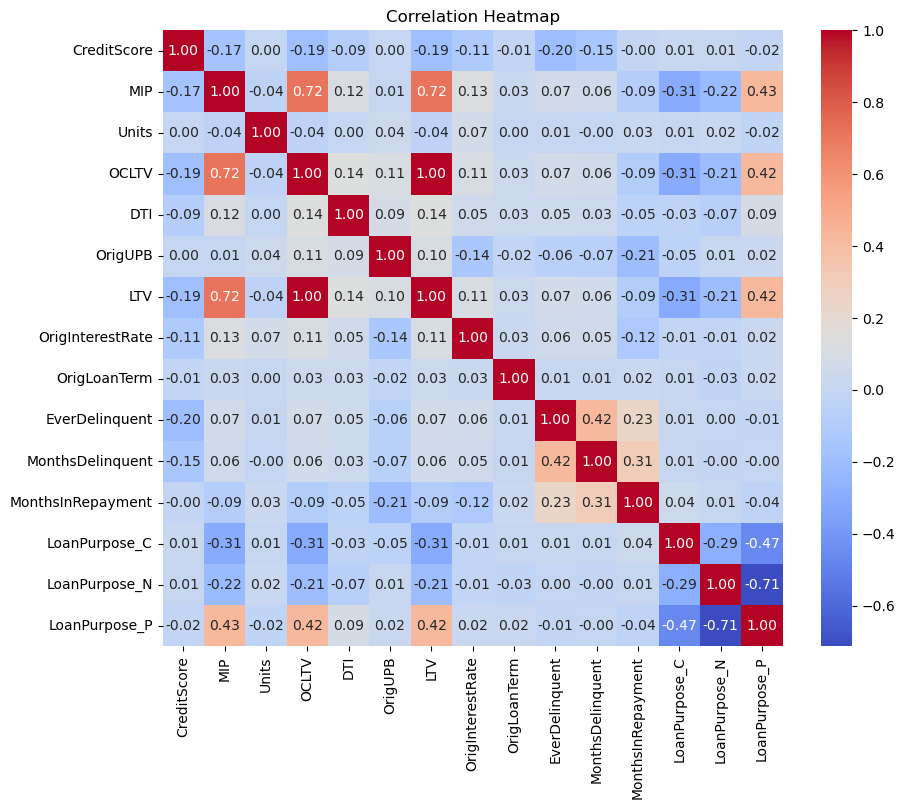

In [86]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Proform some more feature engineering

In [87]:
# Define the function to calculate credit range
def calculate_credit_range(score):
    return 'excellent' if score >= 750 else 'good' if score >= 700 else 'fair' if score >= 650 else 'poor'

# Apply the function using list comprehension within apply
df['CreditRange'] = df['CreditScore'].apply(lambda x: calculate_credit_range(x))

In [88]:
# Define the function to calculate LTV range
def calculate_ltv_range(ltv):
    return 'low' if ltv < 75 else 'medium' if 75 <= ltv < 80 else 'high' if 80 <= ltv < 90 else 'very high'

# Apply the function using list comprehension within apply
df['LTVRange'] = df['LTV'].apply(lambda x: calculate_ltv_range(x))


In [89]:
# Define the function to calculate repayment range
def calculate_repay_range(rate):
    return 'low' if rate < 4 else 'medium' if 4 <= rate < 6 else 'high'

# Apply the function using list comprehension within apply
df['RepayRange'] = df['OrigInterestRate'].apply(lambda x: calculate_repay_range(x))

In [90]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,CreditRange,LTVRange,RepayRange
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,poor,high,high
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,poor,low,high
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,poor,medium,high
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,poor,medium,high
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,poor,medium,high


#### convert categorical ranges to numerical features

In [91]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['LTVRange']= label_encoder.fit_transform(df['LTVRange'])

In [92]:
# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(df['CreditRange'], prefix='CreditRange')
repay_range_dummies = pd.get_dummies(df['RepayRange'], prefix='RepayRange')

In [93]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,CreditRange,LTVRange,RepayRange
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,poor,0,high
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,poor,1,high
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,poor,2,high
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,poor,2,high
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,poor,2,high


In [94]:
# concatenate the newly created numerical features to the original data
df = pd.concat([df, credit_range_dummies, repay_range_dummies], axis=1)

In [95]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,CreditRange,LTVRange,RepayRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,poor,0,high,False,False,False,True,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,poor,1,high,False,False,False,True,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,poor,2,high,False,False,False,True,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,poor,2,high,False,False,False,True,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,poor,2,high,False,False,False,True,True,False


In [96]:
# drop the original categorical ranges
df = df.drop(['CreditRange', 'RepayRange'], axis=1)

In [97]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0,False,False,False,True,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,1,False,False,False,True,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,2,False,False,False,True,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,2,False,False,False,True,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,2,False,False,False,True,True,False


In [98]:
# Convert boolean columns to numerical
df['CreditRange_excellent'] = df['CreditRange_excellent'].astype(int)
df['CreditRange_fair'] = df['CreditRange_fair'].astype(int)
df['CreditRange_good'] = df['CreditRange_good'].astype(int)
df['CreditRange_poor'] = df['CreditRange_poor'].astype(int)
df['RepayRange_high'] = df['RepayRange_high'].astype(int)
df['RepayRange_medium'] = df['RepayRange_medium'].astype(int)

In [99]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0,0,0,0,1,1,0
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,2,0,0,0,1,1,0


In [100]:
df.shape

(213434, 22)

## **Step 9:** *Check and Handle Outliers*

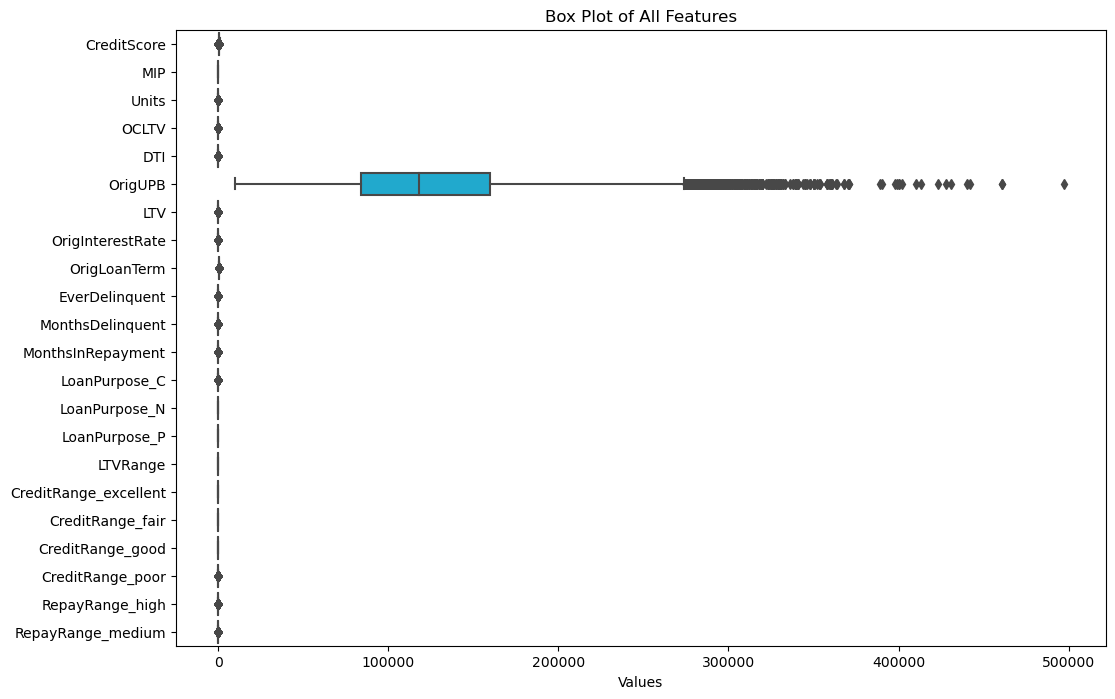

In [101]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.title('Box Plot of All Features')
plt.xlabel('Values')
plt.show()

In [102]:
df.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'LTVRange', 'CreditRange_excellent',
       'CreditRange_fair', 'CreditRange_good', 'CreditRange_poor',
       'RepayRange_high', 'RepayRange_medium'],
      dtype='object')

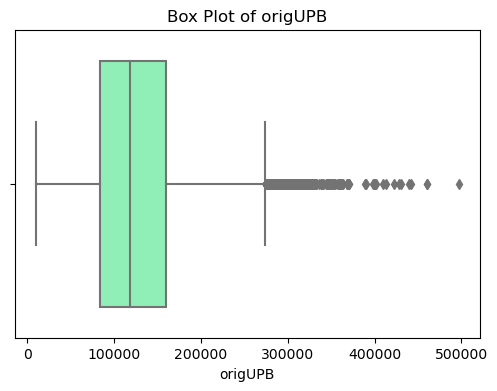

In [103]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigUPB'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

In [104]:
sorted(df.OrigUPB)
Q1, Q3=df.OrigUPB.quantile([0.25, 0.75])
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df['OrigUPB']=np.where(data['OrigUPB']>upper, upper,data['OrigUPB'])
df['OrigUPB']=np.where(data['OrigUPB']<lower, lower,data['OrigUPB'])

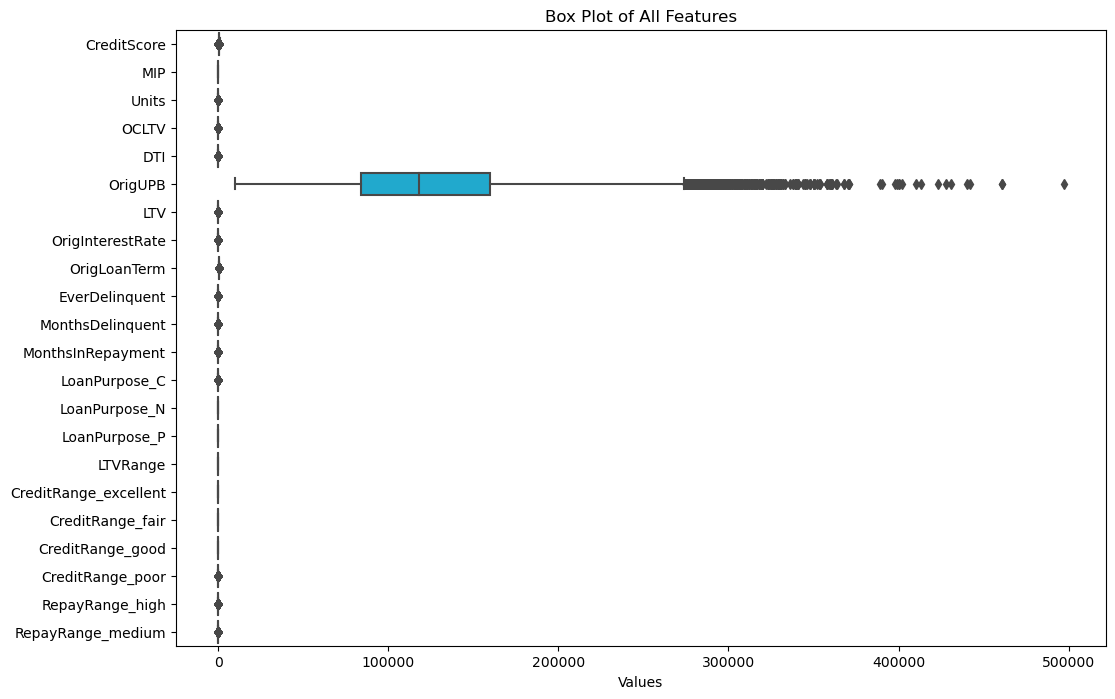

In [105]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.title('Box Plot of All Features')
plt.xlabel('Values')
plt.show()

In [106]:
df['OrigUPB']

0         117000.0
1         109000.0
2          88000.0
3         160000.0
4         109000.0
            ...   
291446     90000.0
291447    267000.0
291448     87000.0
291449     88000.0
291450     70000.0
Name: OrigUPB, Length: 213434, dtype: float64

In [107]:
df.OrigInterestRate

0         6.750
1         6.500
2         6.875
3         6.875
4         7.125
          ...  
291446    7.000
291447    6.375
291448    5.625
291449    7.000
291450    7.000
Name: OrigInterestRate, Length: 213434, dtype: float64

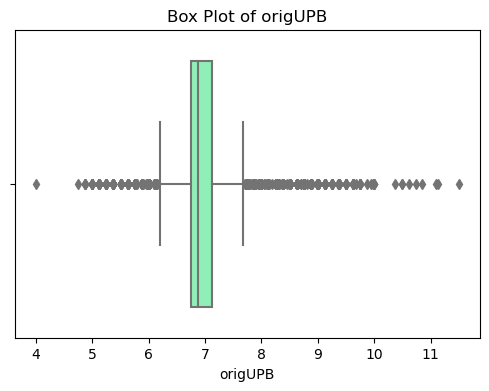

In [108]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigInterestRate'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

In [109]:
sorted(df.OrigInterestRate)
Q1, Q3=df.OrigInterestRate.quantile([0.25, 0.75])
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df['OrigInterestRate']=np.where(data['OrigInterestRate']>upper, upper,data['OrigInterestRate'])
df['OrigInterestRate']=np.where(data['OrigInterestRate']<lower, lower,data['OrigInterestRate'])

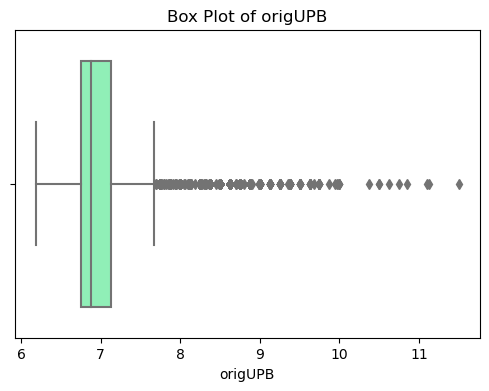

In [110]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigInterestRate'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

## **Step 10:** *Check Duplicated Row and drop them*

In [111]:
df[df.duplicated()]

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
12367,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,2,0,0,0,1,1,0
12368,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,2,0,0,0,1,1,0
12369,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,2,0,0,0,1,1,0
16061,624,0,1,47,39,34000.0,47,7.625,360,0,0,45,0,1,0,1,0,0,0,1,1,0
56269,663,0,2,69,35,80000.0,69,7.250,360,0,0,195,0,1,0,1,0,1,0,0,1,0
59713,666,0,1,70,4,69000.0,70,7.375,360,1,1,56,0,1,0,1,0,1,0,0,1,0
59714,666,0,1,70,4,69000.0,70,7.375,360,1,1,56,0,1,0,1,0,1,0,0,1,0
59994,666,0,1,71,3,51000.0,71,7.375,360,1,1,61,0,1,0,1,0,1,0,0,1,0
71495,674,30,1,95,39,105000.0,95,6.875,360,0,0,54,0,0,1,3,0,1,0,0,1,0
80467,680,0,1,59,43,61000.0,59,7.375,360,0,0,11,0,0,1,1,0,1,0,0,1,0


In [112]:
df=df.drop_duplicates()
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000.0,89,6.750,360,0,0,52,0,0,1,0,0,0,0,1,1,0
1,0,0,1,73,17,109000.0,73,6.500,360,0,0,144,0,1,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000.0,75,6.875,360,0,0,67,0,1,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000.0,76,6.875,360,0,0,35,0,1,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000.0,78,7.125,360,0,0,54,0,1,0,2,0,0,0,1,1,0


In [113]:
df.shape

(213398, 22)

In [114]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000.0,89,6.750,360,0,0,52,0,0,1,0,0,0,0,1,1,0
1,0,0,1,73,17,109000.0,73,6.500,360,0,0,144,0,1,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000.0,75,6.875,360,0,0,67,0,1,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000.0,76,6.875,360,0,0,35,0,1,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000.0,78,7.125,360,0,0,54,0,1,0,2,0,0,0,1,1,0


## **Step 11:** *Check Correlation and drop some columns*

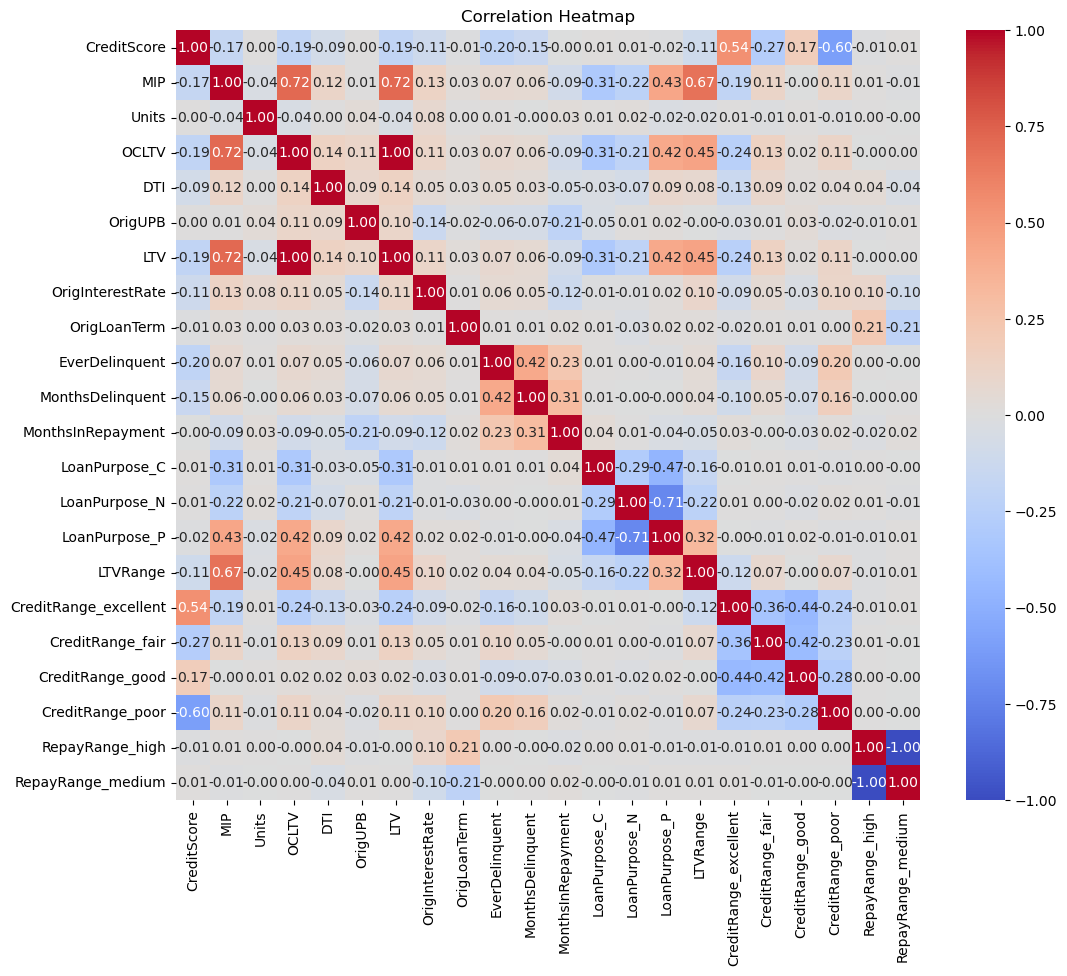

In [115]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## **Step 12:** *Drop strongly corrolated columns*

In [116]:
df.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'LTVRange', 'CreditRange_excellent',
       'CreditRange_fair', 'CreditRange_good', 'CreditRange_poor',
       'RepayRange_high', 'RepayRange_medium'],
      dtype='object')

In [117]:
drop_columns = ["CreditScore", "MIP",'LTV', "RepayRange_high", "CreditRange_poor", ]
df.drop(drop_columns,axis=1,inplace=True)

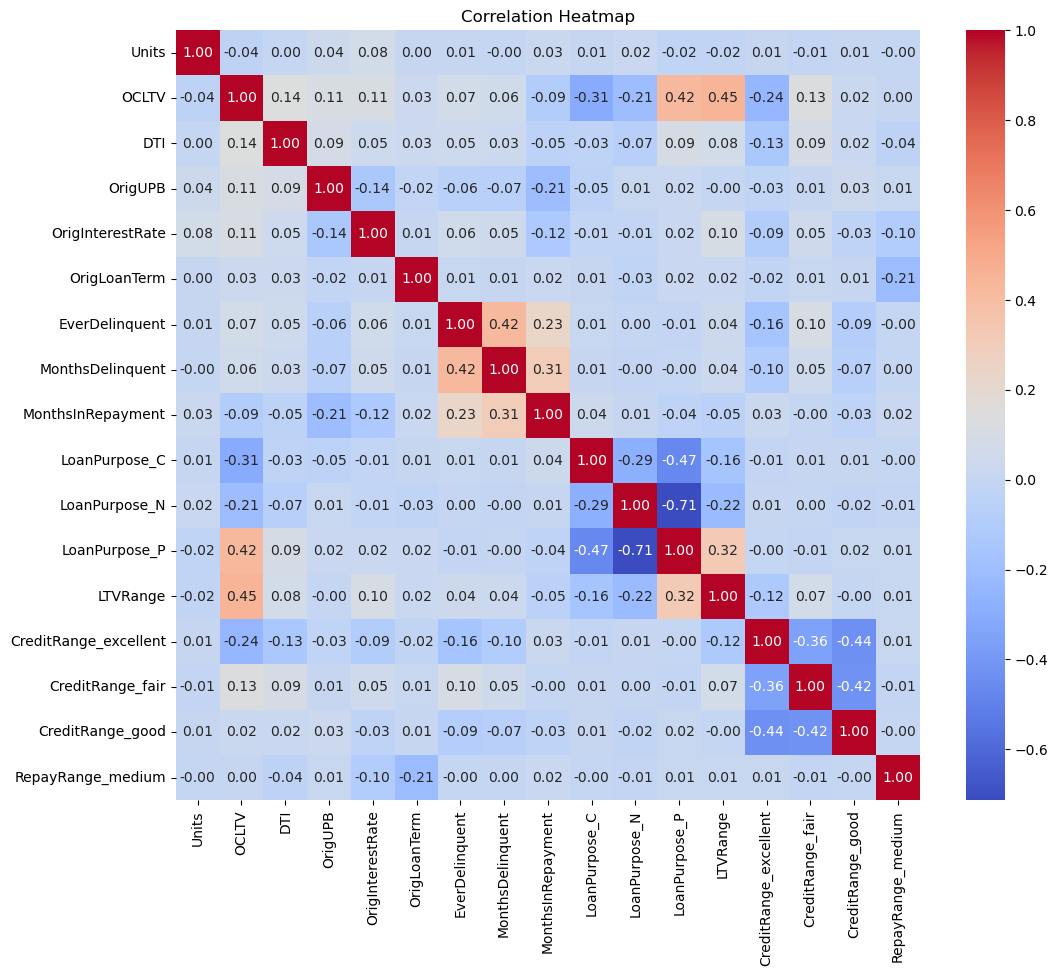

In [118]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [119]:
# drop_columns = ["LoanPurpose_P"]
# df.drop(drop_columns,axis=1,inplace=True)

In [120]:
df.head()

,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,RepayRange_medium
0,1,89,27,117000.0,6.750,360,0,0,52,0,0,1,0,0,0,0,0
1,1,73,17,109000.0,6.500,360,0,0,144,0,1,0,1,0,0,0,0
2,1,75,16,88000.0,6.875,360,0,0,67,0,1,0,2,0,0,0,0
3,1,76,14,160000.0,6.875,360,0,0,35,0,1,0,2,0,0,0,0
4,1,78,18,109000.0,7.125,360,0,0,54,0,1,0,2,0,0,0,0


In [121]:
df.EverDelinquent.unique()

array([0, 1], dtype=int64)

## **Step 13:** *Drop Null values* 

In [122]:
df.isnull().sum()

Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
RepayRange_medium        0
dtype: int64

In [123]:
# Drop rows with null values
df.dropna(inplace=True)

In [124]:
df.isnull().sum()

Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
RepayRange_medium        0
dtype: int64

## **Step 14:** *Saperate Dependent variable and independent variable*

In [125]:
# Features (X)
X = df.drop(columns=['EverDelinquent'])

# Target variable (y)
y = df['EverDelinquent']

In [126]:
X.shape, y.shape

((213398, 16), (213398,))

## **Step 15:** *Scaler the Features*

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213398 entries, 0 to 291450
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Units                  213398 non-null  int64  
 1   OCLTV                  213398 non-null  int64  
 2   DTI                    213398 non-null  int64  
 3   OrigUPB                213398 non-null  float64
 4   OrigInterestRate       213398 non-null  float64
 5   OrigLoanTerm           213398 non-null  int64  
 6   MonthsDelinquent       213398 non-null  int64  
 7   MonthsInRepayment      213398 non-null  int64  
 8   LoanPurpose_C          213398 non-null  int32  
 9   LoanPurpose_N          213398 non-null  int32  
 10  LoanPurpose_P          213398 non-null  int32  
 11  LTVRange               213398 non-null  int32  
 12  CreditRange_excellent  213398 non-null  int32  
 13  CreditRange_fair       213398 non-null  int32  
 14  CreditRange_good       213398 non-null  i

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)

In [129]:
print(scaler_X.shape)

(213398, 16)


In [130]:
scaler_X

array([[-0.12319126,  0.70134271, -0.40736149, ..., -0.58402047,
        -0.71776065, -0.04586698],
       [-0.12319126, -0.33774863, -1.28619192, ..., -0.58402047,
        -0.71776065, -0.04586698],
       [-0.12319126, -0.20786221, -1.37407496, ..., -0.58402047,
        -0.71776065, -0.04586698],
       ...,
       [-0.12319126, -0.33774863, -0.05582932, ..., -0.58402047,
        -0.71776065, 21.80217469],
       [-0.12319126,  0.11685383,  1.96548067, ..., -0.58402047,
        -0.71776065, -0.04586698],
       [-0.12319126, -2.02627205, -0.2315954 , ..., -0.58402047,
        -0.71776065, -0.04586698]])

## **Step 16:** *Model Building*

In [131]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) 

In [132]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))

print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (128038, 16)
X_test shape: (42680, 16)
X_val shape: (42680, 16)
y_train shape: (128038,)
y_test shape: (42680,)
y_val shape: (42680,)


## **Step 17:** *Check and Handle imbalance data*

In [133]:
y_train.value_counts()

EverDelinquent
0    103053
1     24985
Name: count, dtype: int64

In [134]:
X.head()

,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,RepayRange_medium
0,1,89,27,117000.0,6.750,360,0,52,0,0,1,0,0,0,0,0
1,1,73,17,109000.0,6.500,360,0,144,0,1,0,1,0,0,0,0
2,1,75,16,88000.0,6.875,360,0,67,0,1,0,2,0,0,0,0
3,1,76,14,160000.0,6.875,360,0,35,0,1,0,2,0,0,0,0
4,1,78,18,109000.0,7.125,360,0,54,0,1,0,2,0,0,0,0


In [135]:
y

0         0
1         0
2         0
3         0
4         0
         ..
291446    0
291447    0
291448    0
291449    0
291450    0
Name: EverDelinquent, Length: 213398, dtype: int64

In [136]:
from imblearn.over_sampling import SMOTE
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [137]:
X_train_smote.shape, y_train_smote.shape

((206106, 16), (206106,))

In [138]:
y_train_smote.value_counts()

EverDelinquent
0    103053
1    103053
Name: count, dtype: int64

## **Step 18:** *Apply Machine Learning Model*


### **1. Random Forest Model** 

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9982895970009372


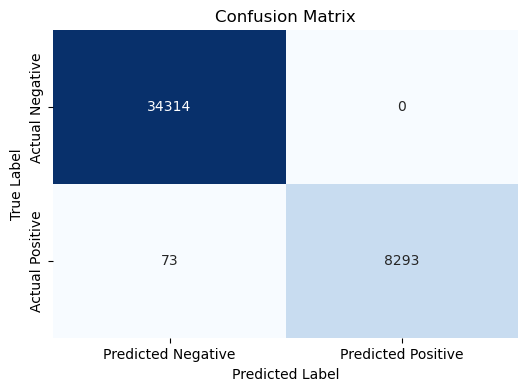

In [140]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [141]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

AUC-ROC: 0.9956371025579727
F1 Score: 0.9956179842727655
Recall: 0.9912742051159454
Precision: 1.0


### **2. KNN Classifier**

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_smote, y_train_smote)

y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8192596063730084


### Hyperparameter Tunning

In [143]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [1, 3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }

# # Initialize the GridSearchCV with the KNeighborsClassifier
# grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train_smote, y_train_smote)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Use the best estimator to make predictions
# best_knn = grid_search.best_estimator_
# y_pred = best_knn.predict(X_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

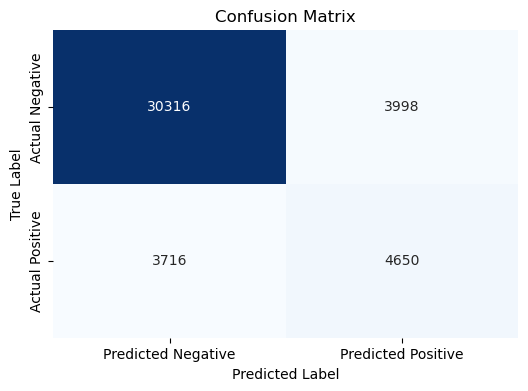

In [144]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [145]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

AUC-ROC: 0.7196544851055694
F1 Score: 0.5466086752086518
Recall: 0.5558211809705953
Precision: 0.5376965772432932


### 3. Apply SVM 

In [146]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9970712277413308


In [147]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

AUC-ROC: 0.9947438111147753
F1 Score: 0.9925172104160431
Recall: 0.9909156108056418
Precision: 0.9941239956829356


### 4. Applying Gradient Boosting Classifier

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting classifier
gbt = GradientBoostingClassifier()

# Train the Gradient Boosting model
gbt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [151]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

AUC-ROC: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


Check overfitting

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have `model`, `X_train`, `X_test`, `y_train`, and `y_test`
# Train the model
gbt.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = gbt.predict(X_train)

# Predictions on the test set
y_test_pred = gbt.predict(X_test)

# Calculate metrics on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_pred)

# Calculate metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred)

# Print the comparison
print("Training Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

print("\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC-ROC: {test_auc_roc:.4f}")

# Check for significant discrepancies
if train_accuracy > test_accuracy + 0.05:
    print("\nWarning: Possible Overfitting detected. The training accuracy is significantly higher than the test accuracy.")
elif test_accuracy > train_accuracy + 0.05:
    print("\nWarning: Possible Underfitting detected. The test accuracy is significantly higher than the training accuracy.")
else:
    print("\nThe model performance on training and test data is balanced.")


Training Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

Testing Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

The model performance on training and test data is balanced.
